# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Import the required libraries**

In [14]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import matplotlib.pylab as pylab
import warnings
warnings.filterwarnings("ignore")

##**Getting data from CSV file using Pandas**

In [15]:
#Importing the 2 datasets
df_Sales = pd.read_csv(r'G:\Datasets\rossmann-store-sales\train.csv')
df_Store = pd.read_csv(r'G:\Datasets\rossmann-store-sales\store.csv')

###Let's see how our data looks like, and what all features we are having.

In [16]:
df_Sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [17]:
df_Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### We have two sets of data. One contains data of sales and customer while the another dataset contains store description.We stored them in variables **'df_Sales'** and **'df_Store'** respectively.

## **1. For Sales dataframe.**

###let's explore the dataset.

In [18]:
df_Sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [19]:
df_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


###Various stores associated with Rossmann are included in this dataset.
###There are details about sales for each day, the number of customers on that day, holidays, promos for that day, as well as what day of the week it is.

In [20]:
df_Sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


###**Check for null and duplicate values**

In [21]:
# Check for null values. 
null_sales_values = df_Sales.isnull().sum()
null_sales_values.sort_values(ascending=False)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [22]:
# Check for duplicate rows.
df_Sales[df_Sales.duplicated()].count()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


###Null and duplicate values, can have huge impact on our model. So it's important to handle them before hand.
###The dataset does not contain any nulls and duplicate values.
###No duplicate data, which means we have just one observation for a particular store on any choosen date

###**For Date Column**

### Check minimum, maximum date in given dataset

In [23]:
print('Minimum date in given dataset is = ',df_Sales['Date'].min())
print('Maximum date in given dataset is = ',df_Sales['Date'].max())

Minimum date in given dataset is =  2013-01-01
Maximum date in given dataset is =  2015-07-31


###It is almost 3 years data.

In [24]:
df_Sales['Date'] = pd.to_datetime(df_Sales.Date)

# extract year, month, day and week of year from "Date"

df_Sales['Year'] =pd.DatetimeIndex(df_Sales.Date).year
df_Sales['Month'] =pd.DatetimeIndex(df_Sales.Date).month
df_Sales['Day'] =pd.DatetimeIndex(df_Sales.Date).day
df_Sales['WeekOfYear'] = pd.DatetimeIndex(df_Sales.Date).weekofyear

### **Check various condition for Sales.**

In [25]:

x_1 = len(df_Sales[df_Sales['Sales'] < 0])
print(f'Count of sales that are less than zero == {x_1}')

print('--'*30)

x_2 = len(df_Sales[df_Sales['Sales'] == 0])
print(f'Count of sales with a value of zero == {x_2}')

print('--'*30)

x_3 = len(df_Sales[df_Sales['Open'] == 0])
print(f'Count of sales when store is closed == {x_3}')

print('--'*30)

x_4 = len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Open'] == 0)])
print(f'Count of sales with a value of zero when store is closed == {x_4}')

print('--'*30)

x_5 = len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Open'] == 1)])
print(f'Count of sales with a value of zero when store is open == {x_5}')

print('--'*30)

x_6 = len(df_Sales[(df_Sales['Sales'] > 0)&(df_Sales['Open'] == 0)])
print(f'Count of sales that greater than zero when the store is closed == {x_6}')

Count of sales that are less than zero == 0
------------------------------------------------------------
Count of sales with a value of zero == 172871
------------------------------------------------------------
Count of sales when store is closed == 172817
------------------------------------------------------------
Count of sales with a value of zero when store is closed == 172817
------------------------------------------------------------
Count of sales with a value of zero when store is open == 54
------------------------------------------------------------
Count of sales that greater than zero when the store is closed == 0


###**Check various condition for Customer.**

In [26]:
y_1 = len(df_Sales[df_Sales['Customers'] < 0])
print(f'Count of Sales with less than zero customers== {x_1}')

print('--'*30)

y_2 = len(df_Sales[df_Sales['Customers'] == 0])
print(f'Count of Sales with zero customers == {y_2}')

print('--'*30)

y_3 = len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Customers'] == 0)])
print(f'Count of Sales with value zero for zero customers == {y_3}')

print('--'*30)

y_4 = len(df_Sales[(df_Sales['Sales'] != 0)&(df_Sales['Customers'] == 0)])
print(f'Count of Sales that do not equal zero when customers are zero == {y_4}')

print('--'*30)

y_5 = len(df_Sales[(df_Sales['Sales'] == 0)&(df_Sales['Customers'] > 0)])
print(f'Count of Sales that equal zero when customers are more than zero == {y_5}')


Count of Sales with less than zero customers== 0
------------------------------------------------------------
Count of Sales with zero customers == 172869
------------------------------------------------------------
Count of Sales with value zero for zero customers == 172869
------------------------------------------------------------
Count of Sales that do not equal zero when customers are zero == 0
------------------------------------------------------------
Count of Sales that equal zero when customers are more than zero == 2


##**Columns and Values Filtering**

### As we can see we have a fair amount of observation of days on which store is closed and as these observations doesn't provide us with any useful information regarding sales or customers we will drop them

### Also closed stores and closed stores with 0 sales are equal. So we can remove those observations as well as can get rid of the 'Open' column.


In [27]:
#Dropping all the observation of those days on which the stores are closed
closedStore_index = df_Sales[df_Sales["Open"] == 0].index
df_Sales.drop(closedStore_index , inplace = True )

# This column would be constant == 1, useless for our prediction
df_Sales.drop('Open',axis=1,inplace=True)

In [28]:
#Checking the shape of the data after dropping the rows above
df_Sales.shape

(844392, 12)

### Now we have 844392 rows down from 1017209 that we had earlier

##**For Store Dataframe**

In [29]:
# df_Store = pd.read_csv('/content/drive/MyDrive/Retail Sales Dataset - Regression /store.csv')

In [30]:
df_Store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [31]:
df_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [32]:
df_Store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


###This dataset contains information on all stores. Like type of store, range of products, competitions and if store is participating in different promo and for how long.


In [33]:
print(df_Sales['Store'].nunique())
print(df_Store['Store'].nunique())

print(set(pd.DataFrame(df_Sales['Store'].value_counts()).index.to_list()) - set(pd.DataFrame(df_Store['Store'].value_counts()).index.to_list()))

1115
1115
set()


###As we can notice above we have in total 1115 unique stores in our sales dataset which is same as in our store dataset
###Sales and Store dataset have same number of stores.

In [34]:
# Check for duplicate rows.
df_Store[df_Store.duplicated()].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###The dataset does not contain any duplicate values.
###Which means we have just one observation for a particular store.

In [35]:
# Missing data counts and percentage
print('Missing Data Count')
print(df_Store.isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_Store.isnull().sum().sort_values(ascending = False)/len(df_Store)*100,2))

Missing Data Count
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
CompetitionDistance           0.27
Store                         0.00
StoreType                     0.00
Assortment                    0.00
Promo2                        0.00
dtype: float64


In [36]:
df_Store[df_Store['Promo2']!=0].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"


In [37]:
df_Store[df_Store['Promo2']==0].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


In [38]:
len(df_Store.loc[df_Store['Promo2SinceWeek']==0])

0

In [39]:
df_Store.loc[df_Store['Promo2SinceYear']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [40]:
df_Store.loc[df_Store['PromoInterval']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


### The features Promo2SinceWeek, Promo2SincYear and PromoInterval are NaN for stores that didn't participate in Promo2(i.e. Promo2=0). 
###The lack of Promo2 means that all these features are unimportant.
###Hence, we can **replace NaN** values in these **3 features with 0.** 
### Zero will represent that the particular store didn't participate in Promo2.

In [41]:
#for all 3 features Promo2SinceWeek, Promo2SincYear and PromoInterval

df_Store['Promo2SinceWeek'].fillna(0, inplace = True)
df_Store['Promo2SinceYear'].fillna(0, inplace = True)
df_Store['PromoInterval'].fillna(0, inplace = True)

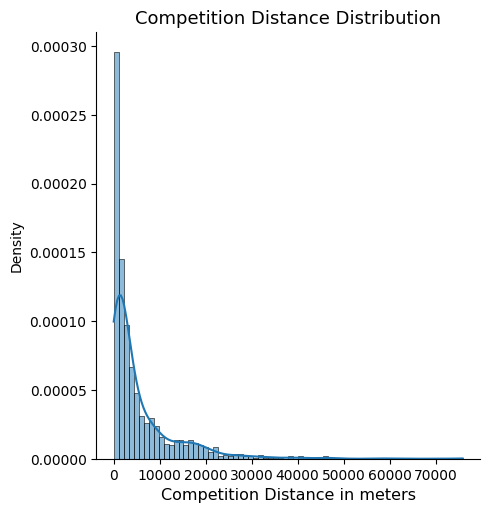

In [42]:
#Plotting distribution of Competition Distance.

p=sns.displot(data = df_Store, x='CompetitionDistance',stat = 'density',kde=True,bins=70)
p.fig.set_dpi(100)
plt.title('Competition Distance Distribution',size = 13)
plt.xlabel('Competition Distance in meters',fontsize=11.5)
plt.show()

In [43]:
Mean_Competition_Distance=df_Store['CompetitionDistance'].mean()
print(f'Most of stores have their competition distance in {Mean_Competition_Distance} Metre.')

Most of stores have their competition distance in 5404.901079136691 Metre.


###The figure above shows that most of the stores have their competition between 0km to 10km of their location.
###Hence, we can **replace NaN** values in these feature with mean value. 


In [44]:
df_Store['CompetitionDistance'].fillna(str(df_Store['CompetitionDistance'].mean()),inplace=True)

### Now for the null values of **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** we can take two approach.
###1.   Replace null values with median of their respective columns
###2.   Replace null values with mean of their respective columns
###If we have extreme outliers we will use the first method and if not, then second works fine.

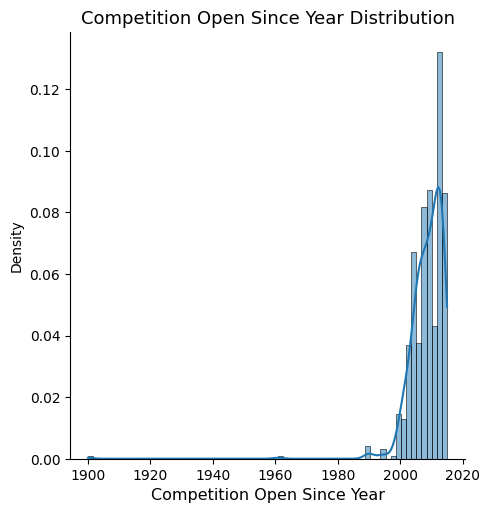

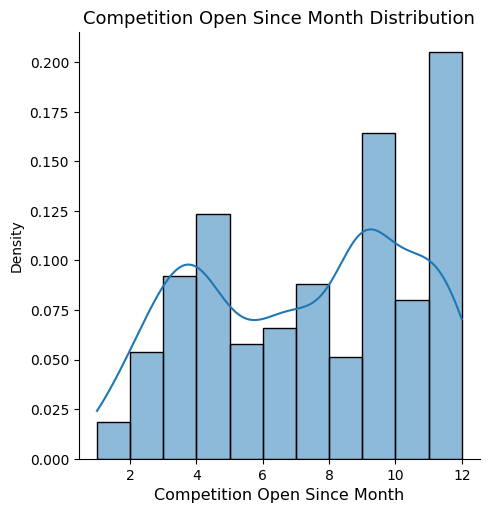

In [45]:
#Plotting distribution of Competition Open Since Year.

p=sns.displot(data = df_Store, x='CompetitionOpenSinceYear', stat = 'density',kde=True,bins=70)
p.fig.set_dpi(100)
plt.title('Competition Open Since Year Distribution',size = 13)
plt.xlabel('Competition Open Since Year',fontsize=11.5)
plt.show()

#Plotting distribution of Competition Open Since month
p=sns.displot(data = df_Store, x='CompetitionOpenSinceMonth', stat = 'density',kde=True)
p.fig.set_dpi(100)
plt.title('Competition Open Since Month Distribution',size = 13)
plt.xlabel('Competition Open Since Month',fontsize=11.5)
plt.show()

###The figure above shows that most of the stores have their competition year between 2000 to 2020 of their location. 
###We can notice above that we have some extreme outliers with values going as low as 1900 and hence we will replace values with median not mean
###Hence, we can **replace NaN** values in these feature with median value. 

In [46]:
#Replacing all the null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear columns with median values
df_Store['CompetitionOpenSinceYear'].fillna(str(df_Store['CompetitionOpenSinceYear'].median()),inplace=True)
df_Store['CompetitionOpenSinceMonth'].fillna(str(df_Store['CompetitionOpenSinceMonth'].median()),inplace=True)

In [47]:
df_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   object 
 4   CompetitionOpenSinceMonth  1115 non-null   object 
 5   CompetitionOpenSinceYear   1115 non-null   object 
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 87.2+ KB


In [48]:
#check for null values again
print(df_Store.isnull().sum().sort_values(ascending = False))

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


###We have unique stores in both datasets, so we can merge both data sets and draw some meanigful insights from that.

In [49]:
# Merging both dataframe on store column
df_rossmann = pd.merge(df_Sales, df_Store, on = 'Store', how = 'left')

In [50]:
df_rossmann.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,...,31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,...,31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


##**Change The Datatype**

###Check the initial data type of each feauture.

In [51]:
df_rossmann.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
WeekOfYear                            int64
StoreType                            object
Assortment                           object
CompetitionDistance                  object
CompetitionOpenSinceMonth            object
CompetitionOpenSinceYear             object
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

###Change the datatypes into desired datatypes for the ease to do EDA

In [52]:
# object to float for distance
df_rossmann['CompetitionDistance'] = df_rossmann['CompetitionDistance'].astype(float)

# float to int in columns related to dates
df_rossmann['CompetitionOpenSinceMonth'] = df_rossmann['CompetitionOpenSinceMonth'].astype(float)
df_rossmann['CompetitionOpenSinceMonth'] = df_rossmann['CompetitionOpenSinceMonth'].astype(int)
df_rossmann['CompetitionOpenSinceYear'] = df_rossmann['CompetitionOpenSinceYear'].astype(float)
df_rossmann['CompetitionOpenSinceYear'] = df_rossmann['CompetitionOpenSinceYear'].astype(int)
df_rossmann['Promo2SinceWeek'] = df_rossmann['Promo2SinceWeek'].astype(int)
df_rossmann['Promo2SinceYear'] = df_rossmann['Promo2SinceYear'].astype(int)

In [53]:
df_rossmann.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
Year                                  int64
Month                                 int64
Day                                   int64
WeekOfYear                            int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int32
CompetitionOpenSinceYear              int32
Promo2                                int64
Promo2SinceWeek                       int32
Promo2SinceYear                       int32
PromoInterval                        object
dtype: object

In [54]:
#Copy the dataset
df_rossmann_1 = df_rossmann.copy()

##**1. Count For Store Open in Week**

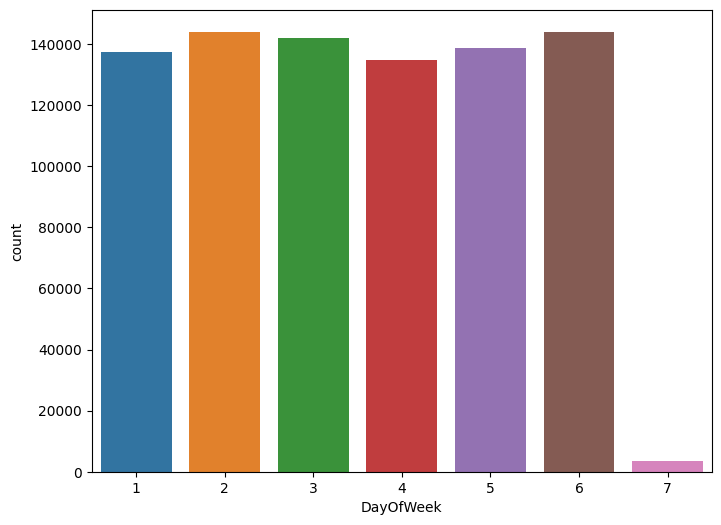

In [55]:
pylab.rcParams['figure.figsize'] = 8,6
sns.countplot(x='DayOfWeek',data=df_rossmann_1)
plt.show()

### **The graph given Above that Stores mainly closed on Sunday, Hence we can predict that the sales would be zero/less on sunday**

##**2. Relation of Promo and Sales**

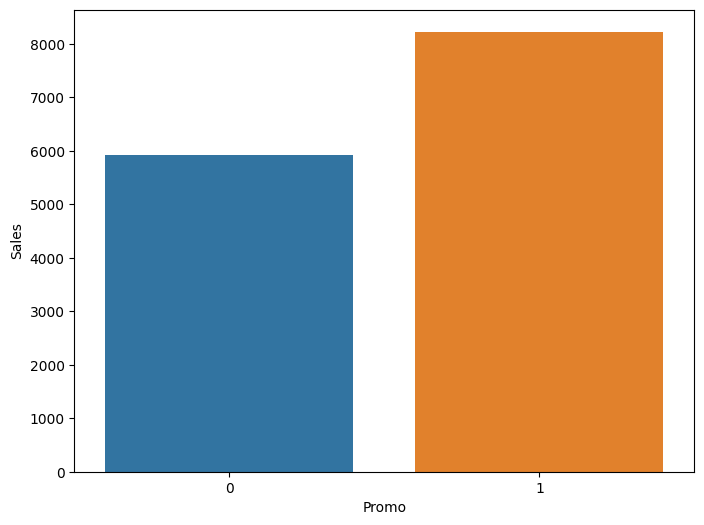

In [56]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(df_rossmann_1.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])
plt.show()

###**Sales are nearly doubled, when the Promo is Running**

##**3. Representation of Sales with Assortment**:

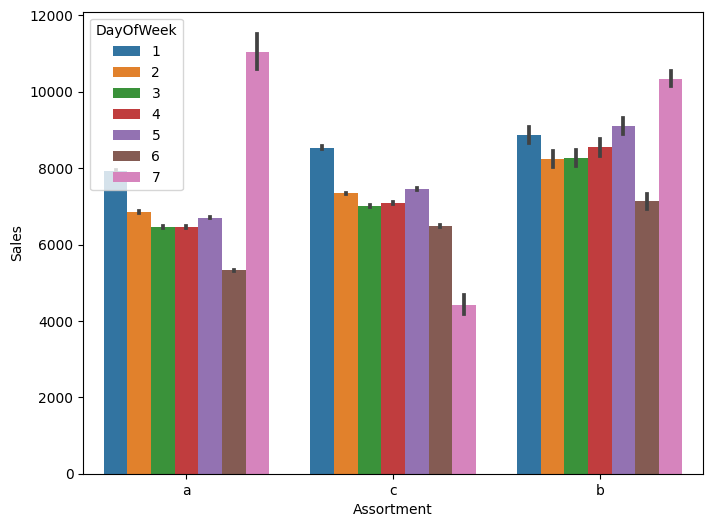

In [57]:
sns.barplot(x="Assortment", y="Sales", data=df_rossmann_1 ,hue="DayOfWeek")
plt.show()

###**Sales are good for assortment of type b on an average as compared to the other assortment types**

##**4. Monthwise Sales**

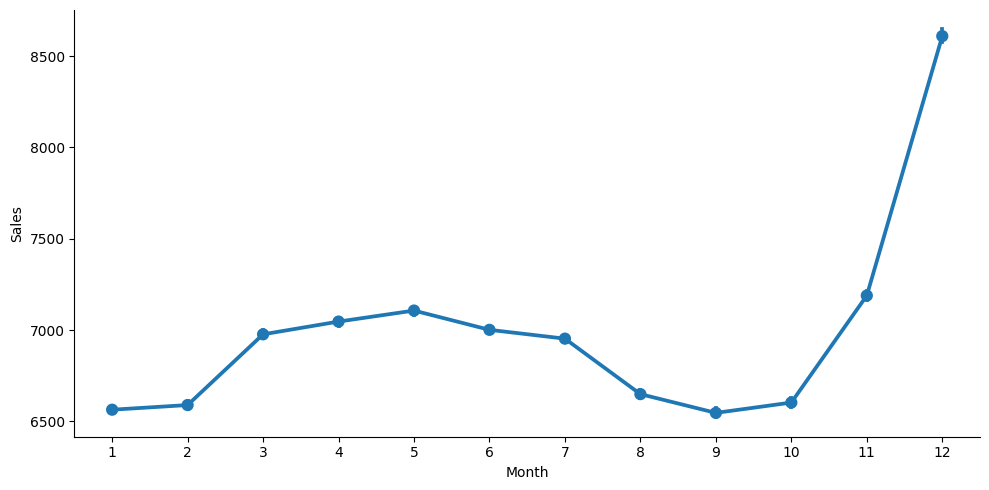

In [58]:
sns.factorplot(x="Month" ,y = "Sales" , data=df_rossmann_1, kind="point", aspect=2,size=5)
plt.show()

###**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the due to the festive season for example christmas and new year.**

##**4. Yearwise Sales**

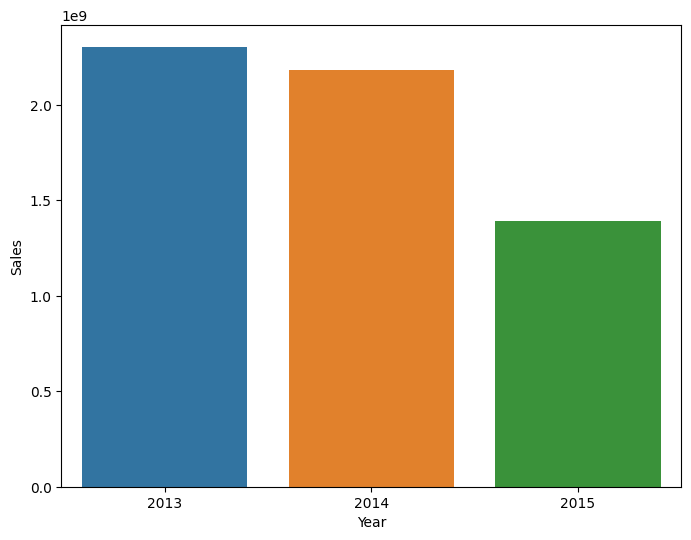

In [59]:
aux = df_rossmann_1[['Year', 'Sales']].groupby('Year').sum().reset_index()

plt.subplot(111)
sns.barplot(data = aux, x= 'Year', y= 'Sales')
plt.show()

The above grapg shows yearly sales data. We can see that the sales has been more in year 2013 and the slightly decrease in year 2014. With only 7 months' sales data for year 2015 we cant say whether the sales in year 2015 was more than the rest or the years or not. 

##**6. Holiday wise Sales**

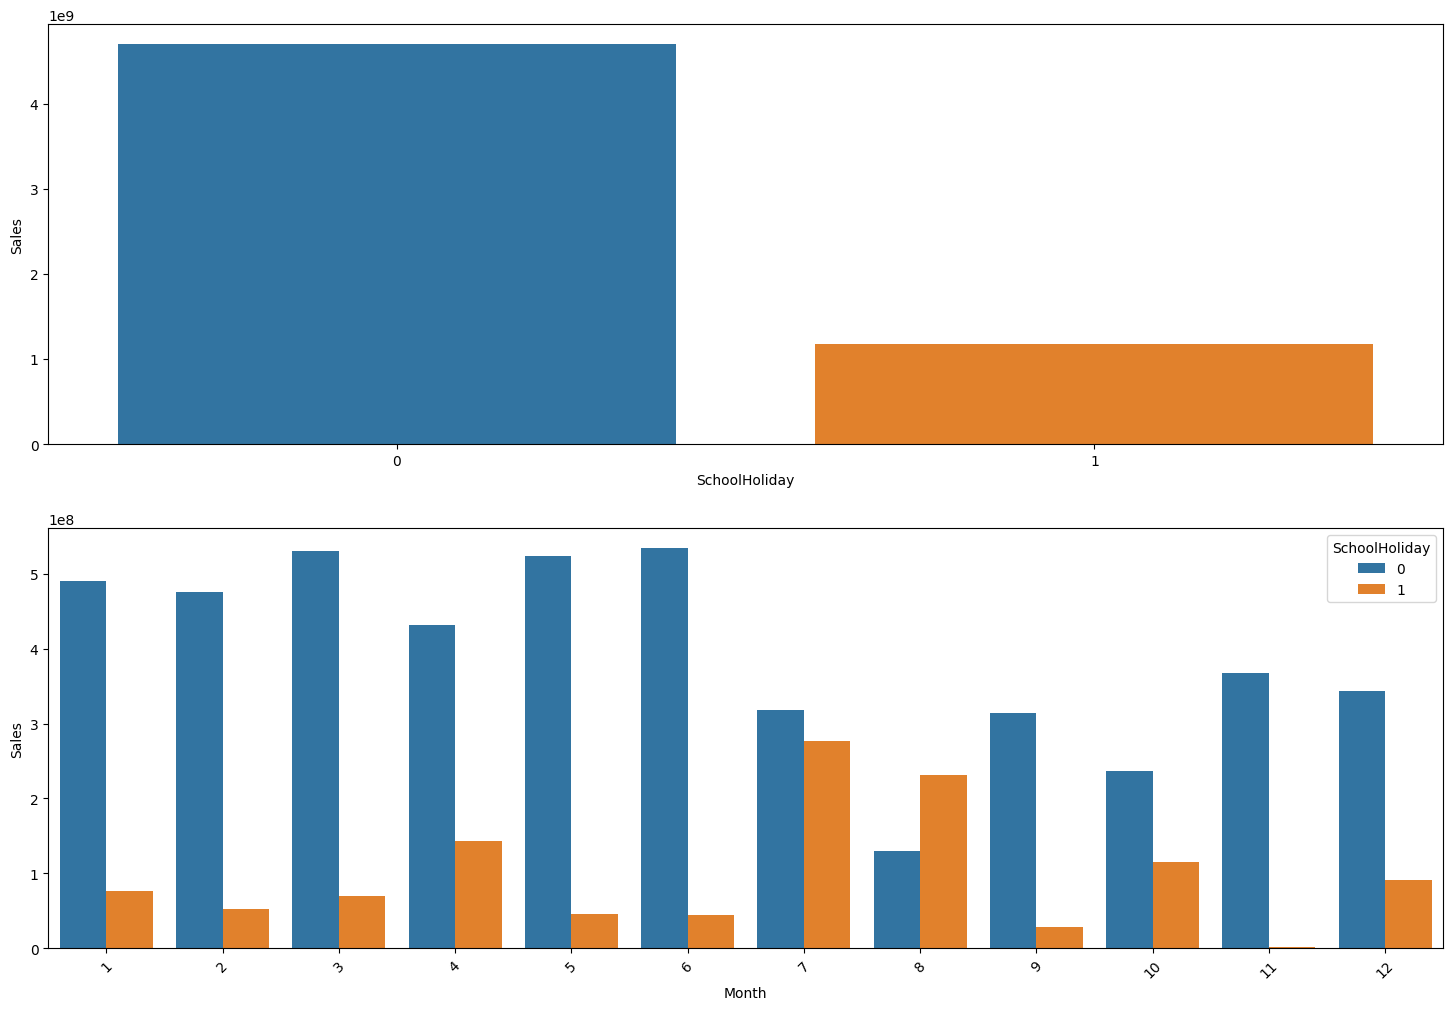

In [60]:
aux = df_rossmann_1[['SchoolHoliday', 'Sales']].groupby('SchoolHoliday').sum().reset_index();

fig = plt.figure(figsize = (18,12))
plt.subplot(211)
sns.barplot(data = aux, x= 'SchoolHoliday', y= 'Sales');

aux2 = df_rossmann_1[['Month','SchoolHoliday', 'Sales']].groupby(['Month','SchoolHoliday']).sum().reset_index();

plt.subplot(212)
sns.barplot(data = aux2, x= 'Month', y= 'Sales', hue= 'SchoolHoliday');
plt.xticks(rotation = 45)
plt.show()

Sales tend to be more on the holidays as compared to the rest of the days. 

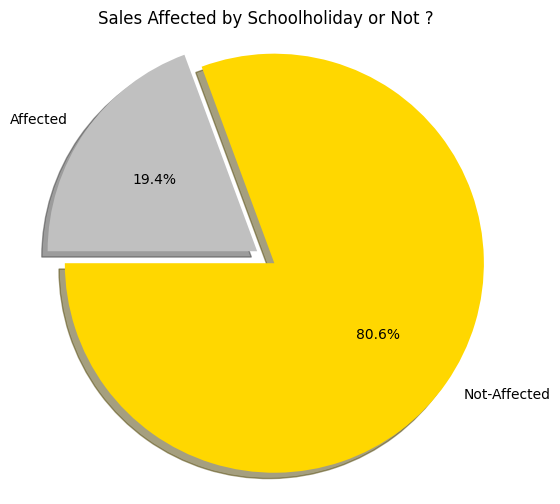

In [61]:
labels = 'Not-Affected' , 'Affected'
sizes = df_rossmann_1.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

###**In the Piechart Sales affected by School Holiday is 19%** 
###**Mainly Sales aren't afffected by School Holiday**

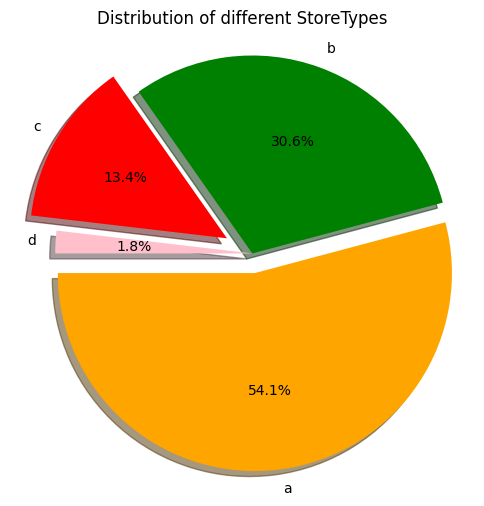

In [62]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = df_rossmann_1.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
plt.rcParams['figure.figsize'] = (15,8)
fig.set_size_inches(6,6)
plt.show()

In the above pie chart we can see that the distribution of 'a' store type is the most with nearly 54.1% followed by 'b' with 30.6%

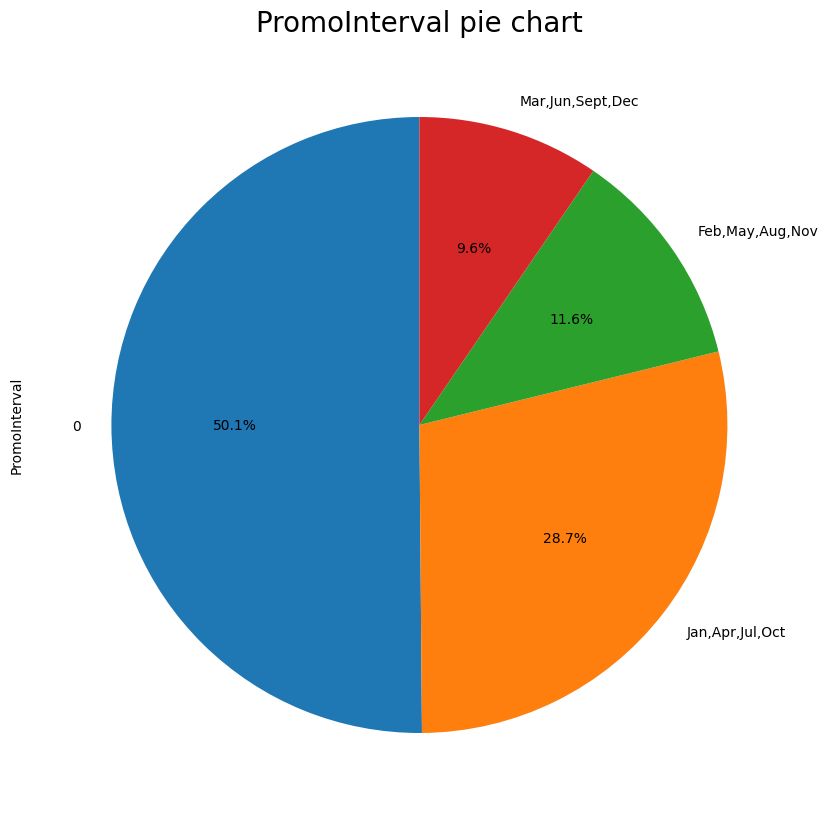

In [63]:
#PromoInterval hist
promo_intervals = df_rossmann_1['PromoInterval'].value_counts().sort_values(ascending=False)
ax = promo_intervals.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('PromoInterval pie chart',size = 20)
plt.show()

49.9% of the promo intervals have been distributed in Jan,Apr,Jul & Oct months. Also, nearly 50% of the time of the year the promotions weren't running at all.

In [64]:
df_rossmann_1["Avg_Customer_Sales"] = df_rossmann_1.Sales/df_rossmann_1.Customers

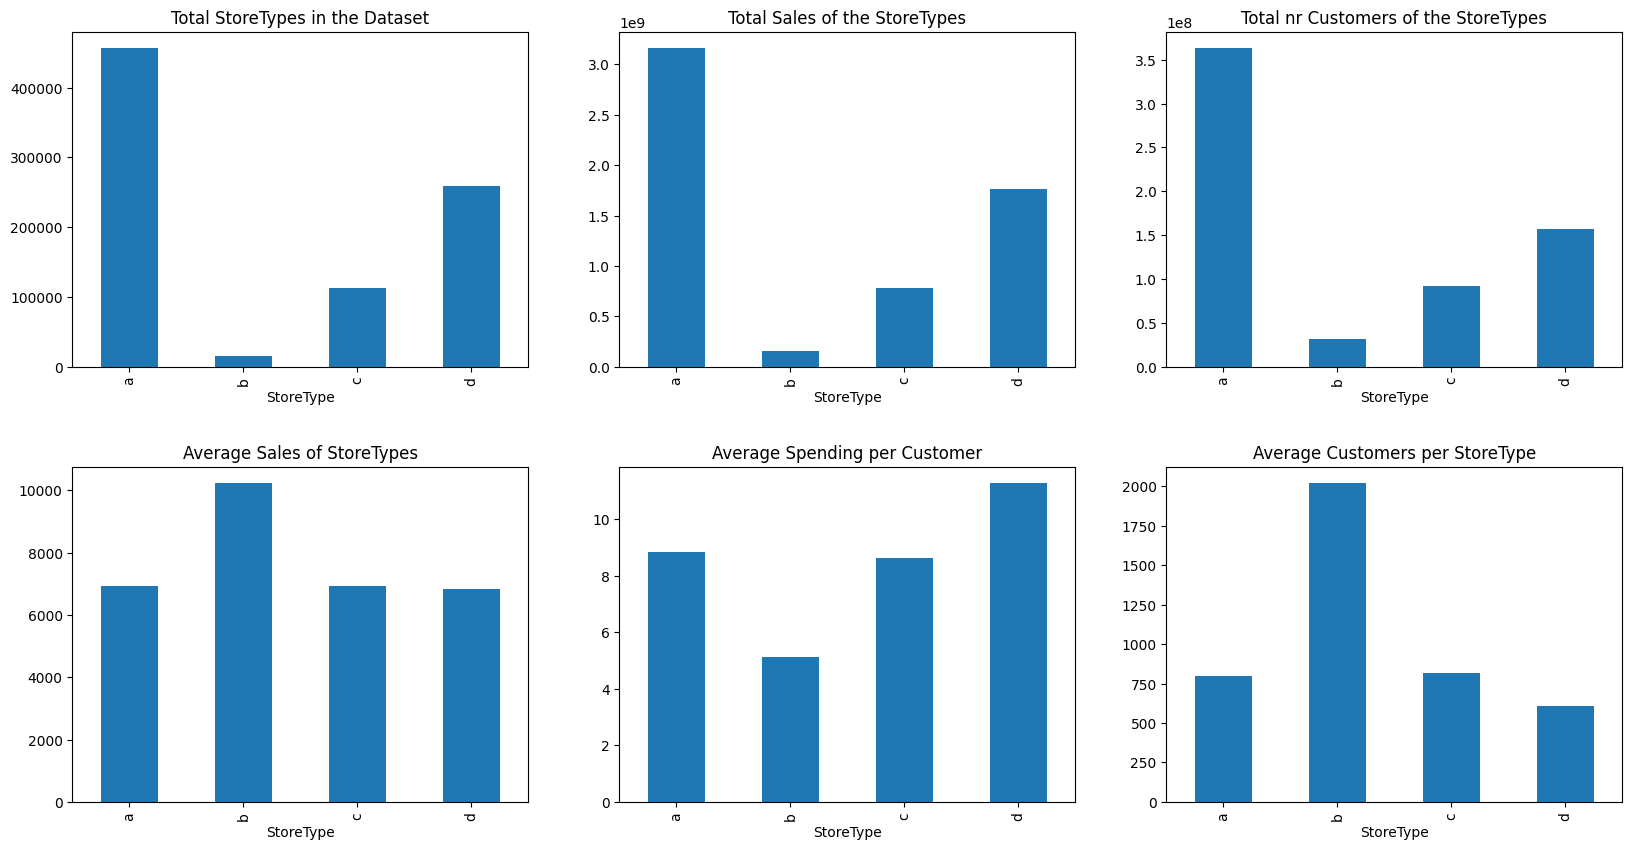

In [65]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

df_rossmann_1.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df_rossmann_1.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df_rossmann_1.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df_rossmann_1.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df_rossmann_1.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df_rossmann_1.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

###**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

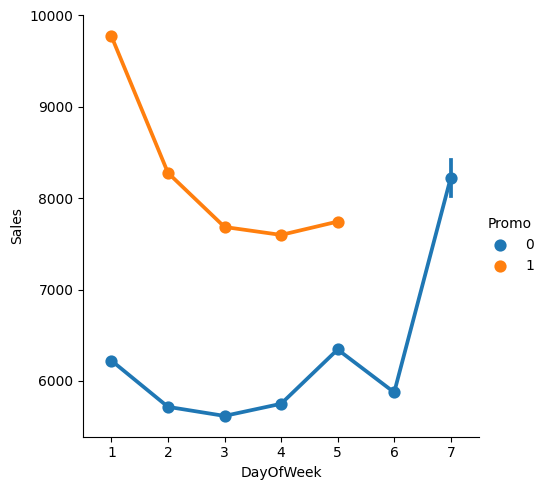

In [66]:
sns.factorplot(data = df_rossmann_1, x = "DayOfWeek", y = "Sales", hue = "Promo")
plt.show()

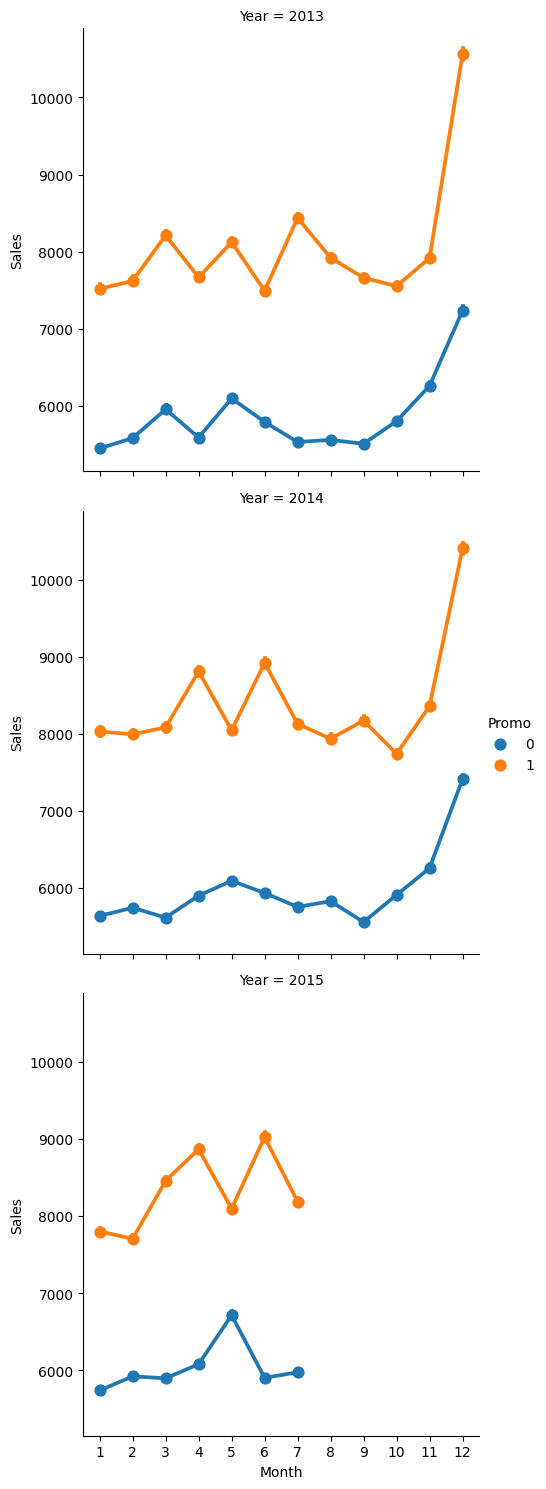

In [67]:
# per store type in cols
sns.factorplot(data = df_rossmann_1, x ="Month", y = "Sales", 
               hue = 'Promo',
               row = "Year"
             )
plt.show()

###**As We can see that Sales is high when there is promotion going on.**

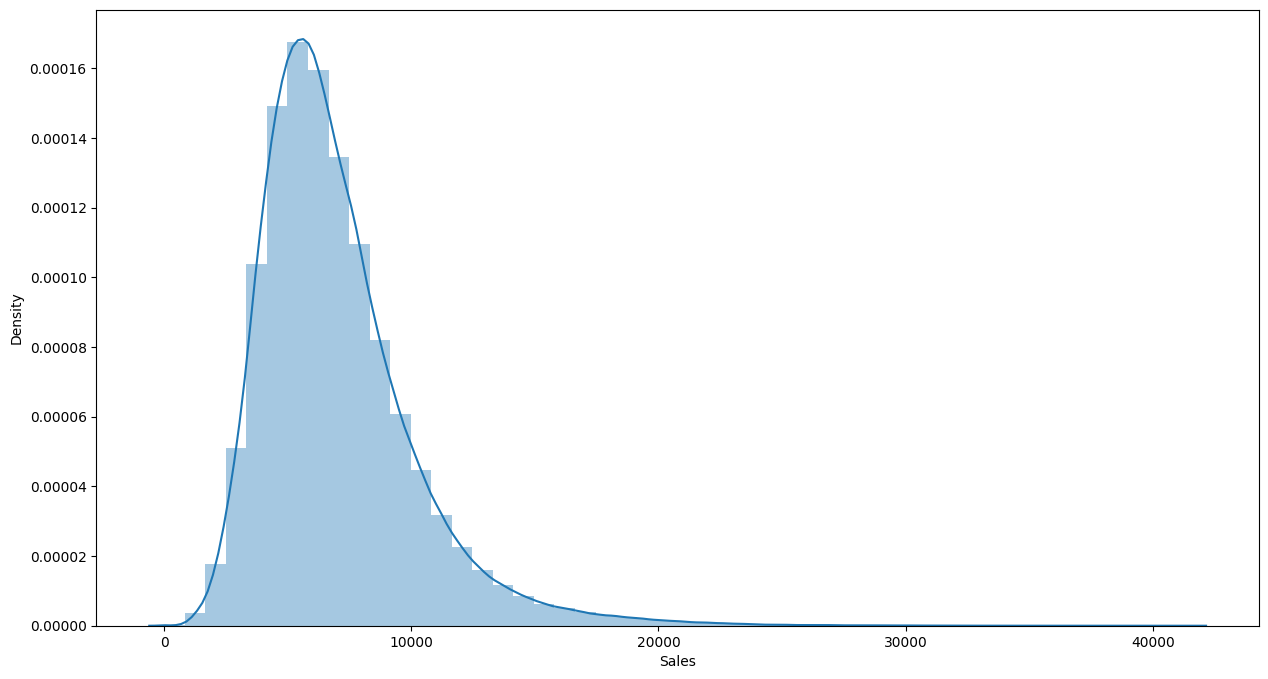

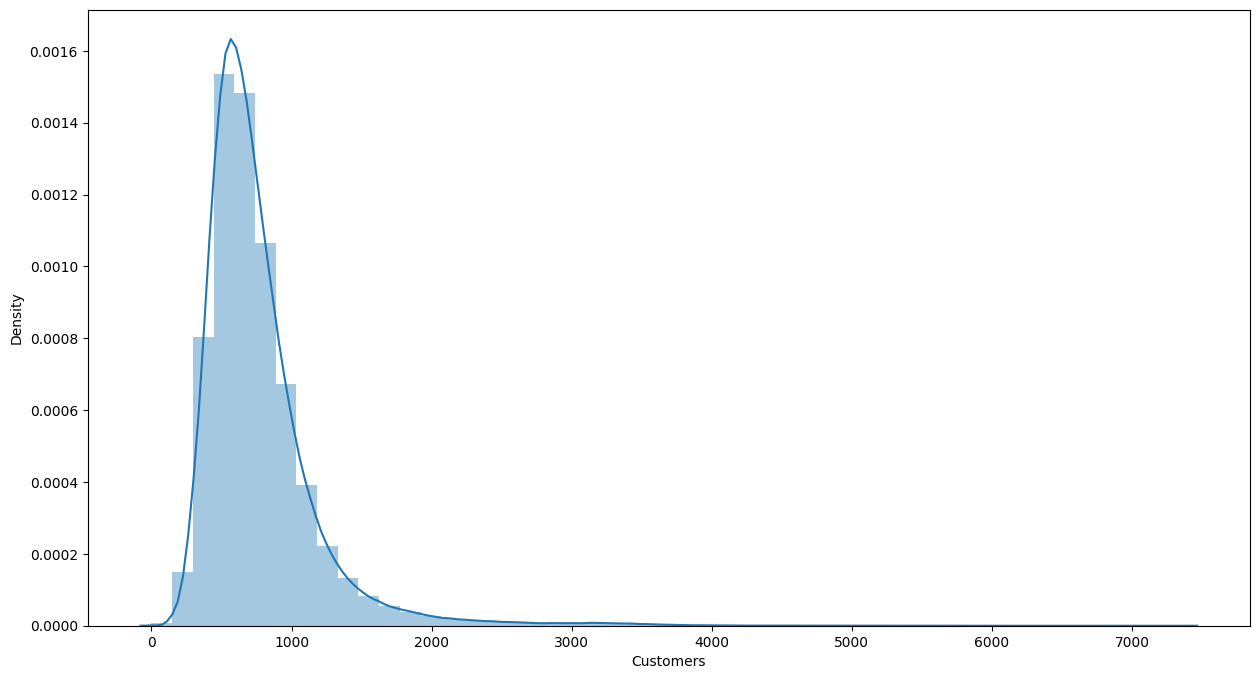

In [68]:
# Distributions
for col in ['Sales', 'Customers']:
  plt.figure()
  sns.distplot(df_rossmann_1[col])
plt.show()

In above distribution graph we can coclude that avg sales have been accounted by most of the customers. 

In [69]:
numeric_features = ['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday','Year', 'Month', 'Day', 'WeekOfYear', 'CompetitionDistance',
                    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2','Promo2SinceWeek', 'Promo2SinceYear']

### **Below are the graphs on how each and every factor impact the sales.**

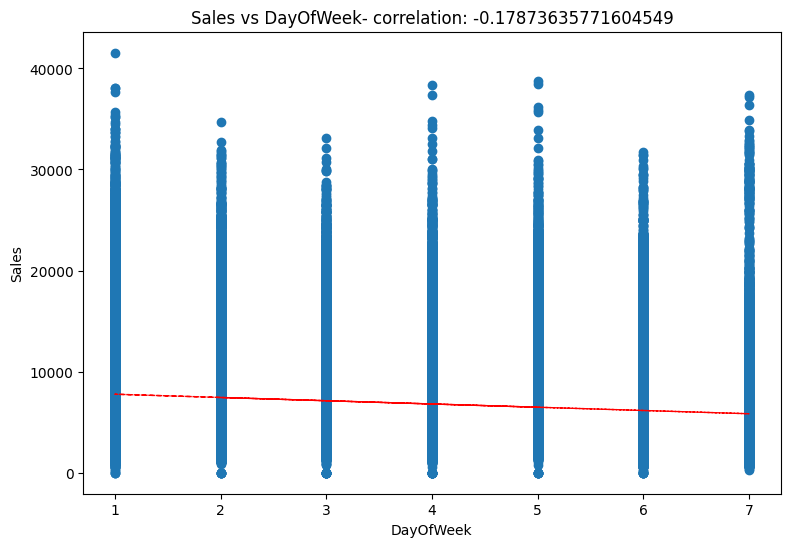

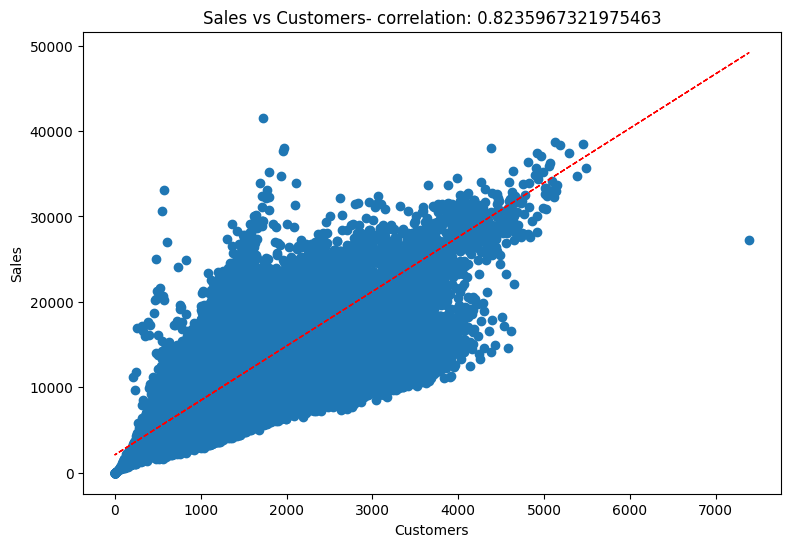

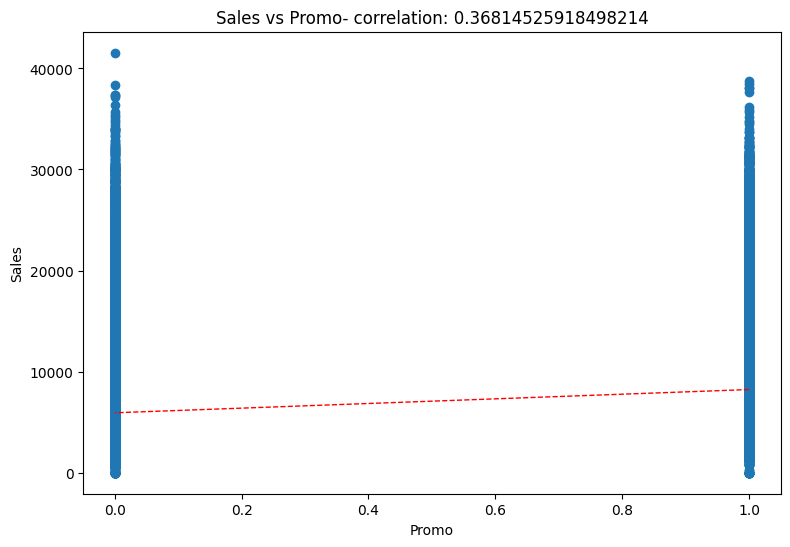

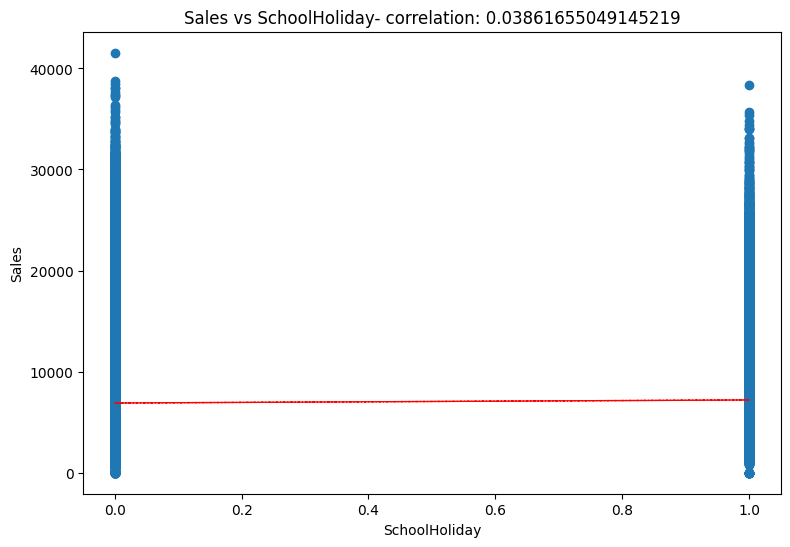

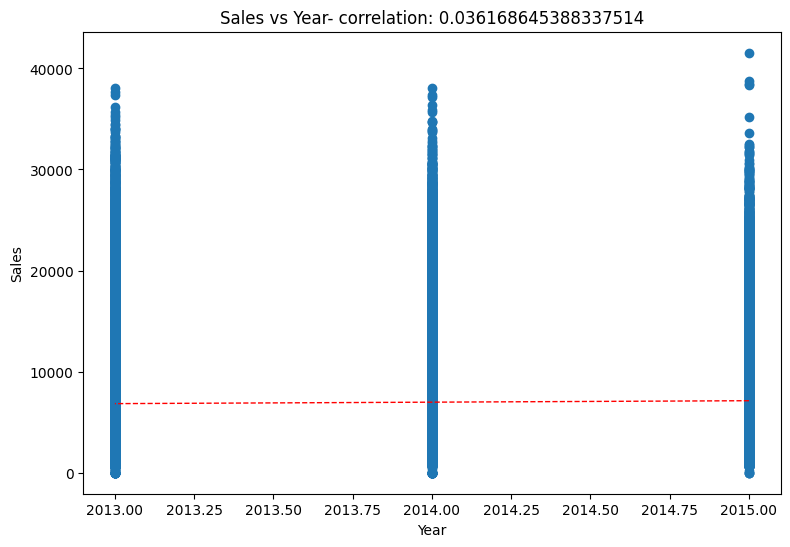

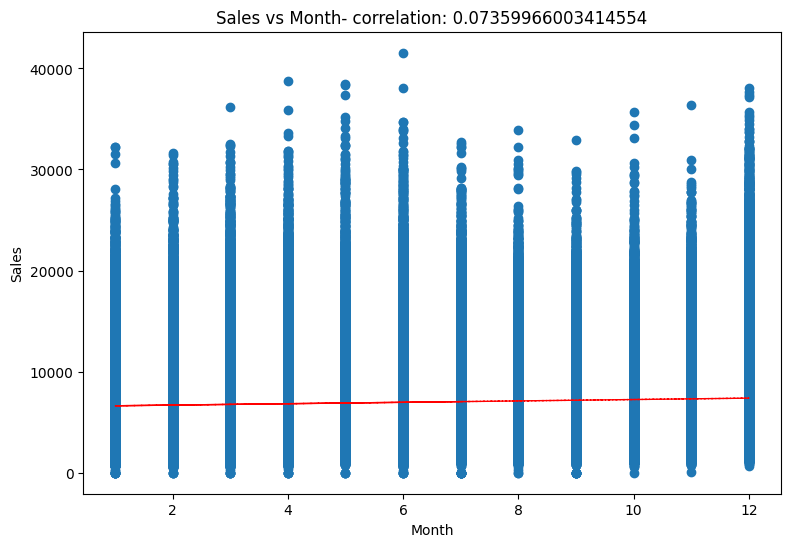

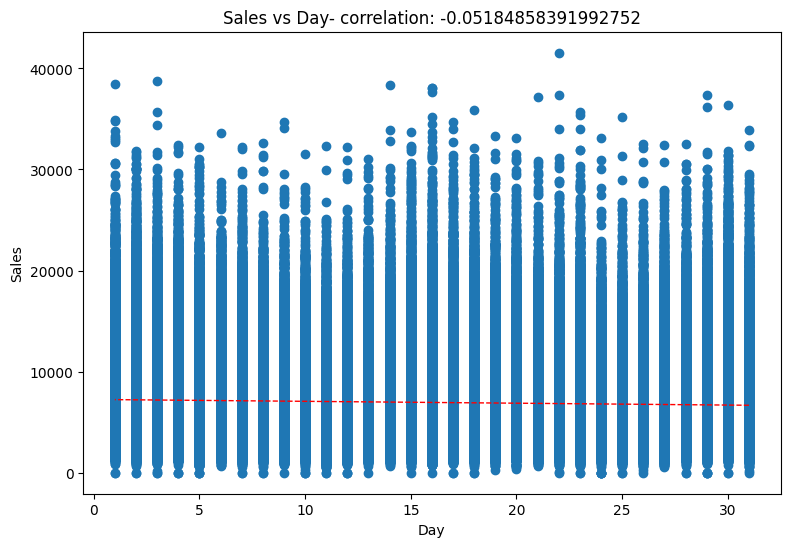

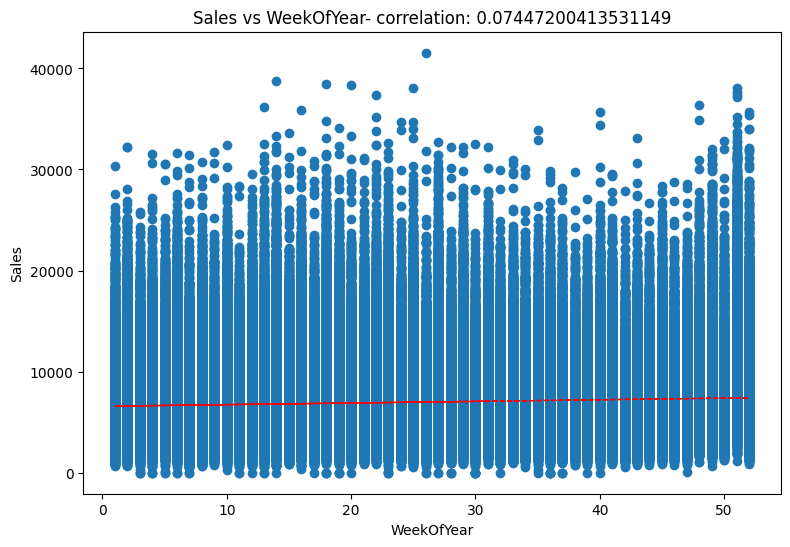

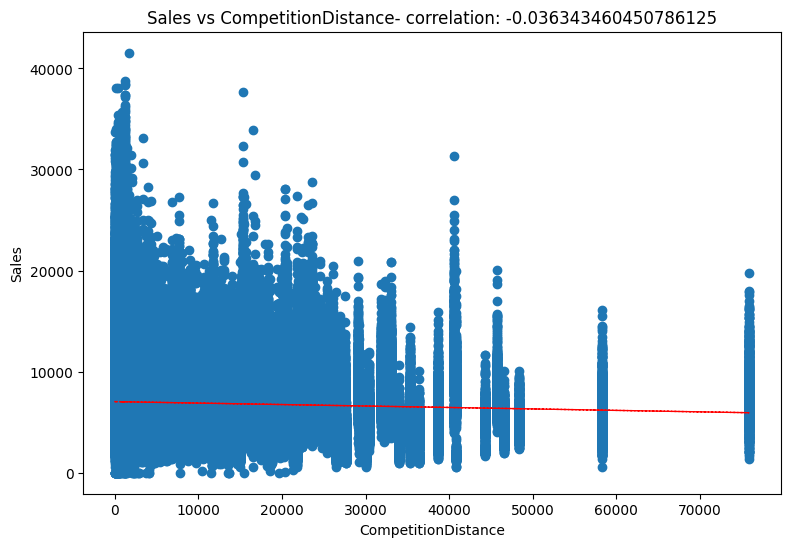

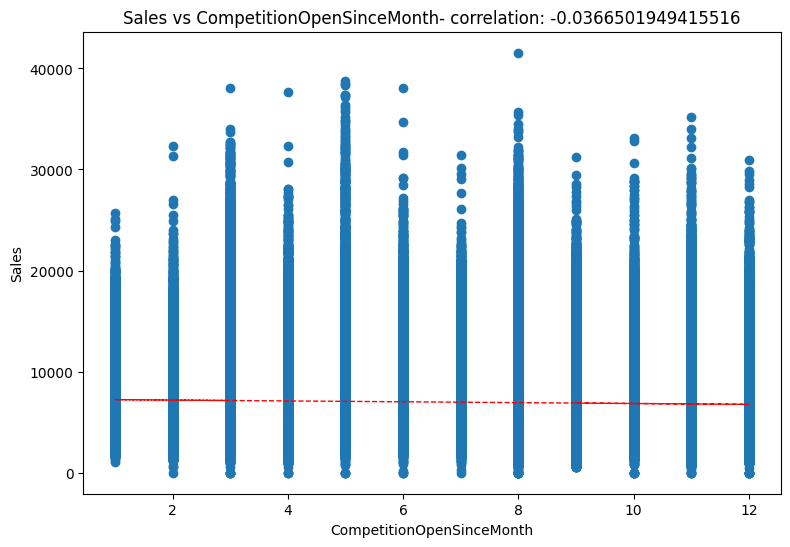

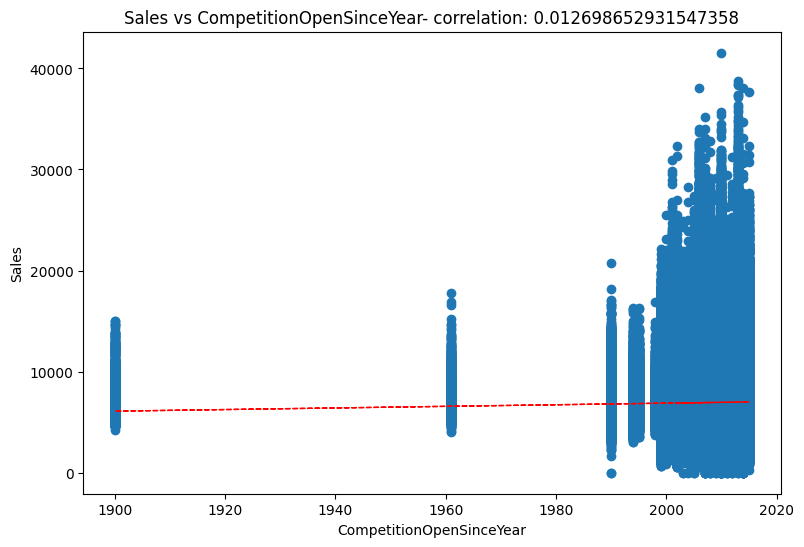

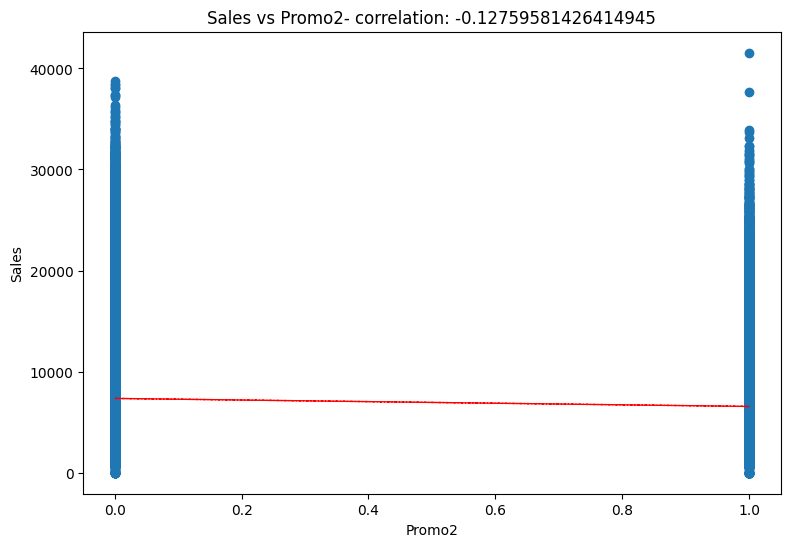

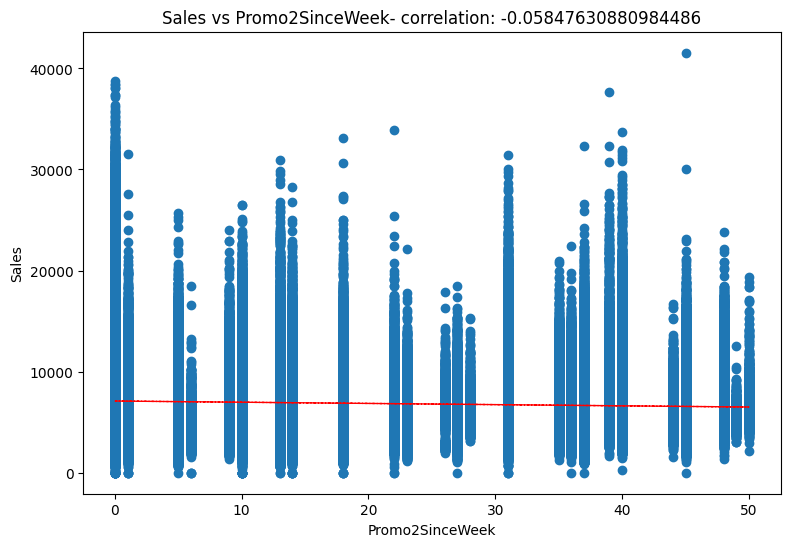

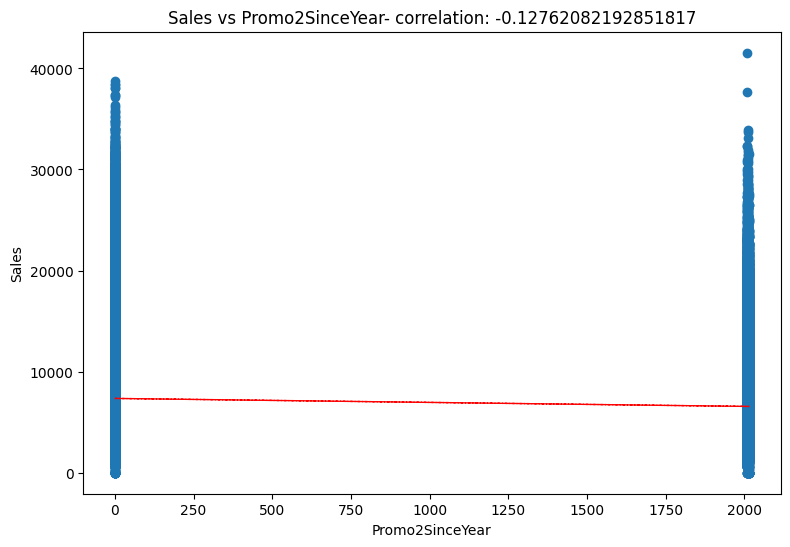

In [70]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_rossmann_1[col]
    label = df_rossmann_1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_rossmann_1[col], df_rossmann_1['Sales'], 1)
    y_hat = np.poly1d(z)(df_rossmann_1[col])

    plt.plot(df_rossmann_1[col], y_hat, "r--", lw=1)

plt.show()

### **In the below heatmap graph we can see that there are certain feauters which have greater impact on sales because of their higher correlation with the sales. For example : Customers, Promotions, Month of the sale (Festive Seaesons)**

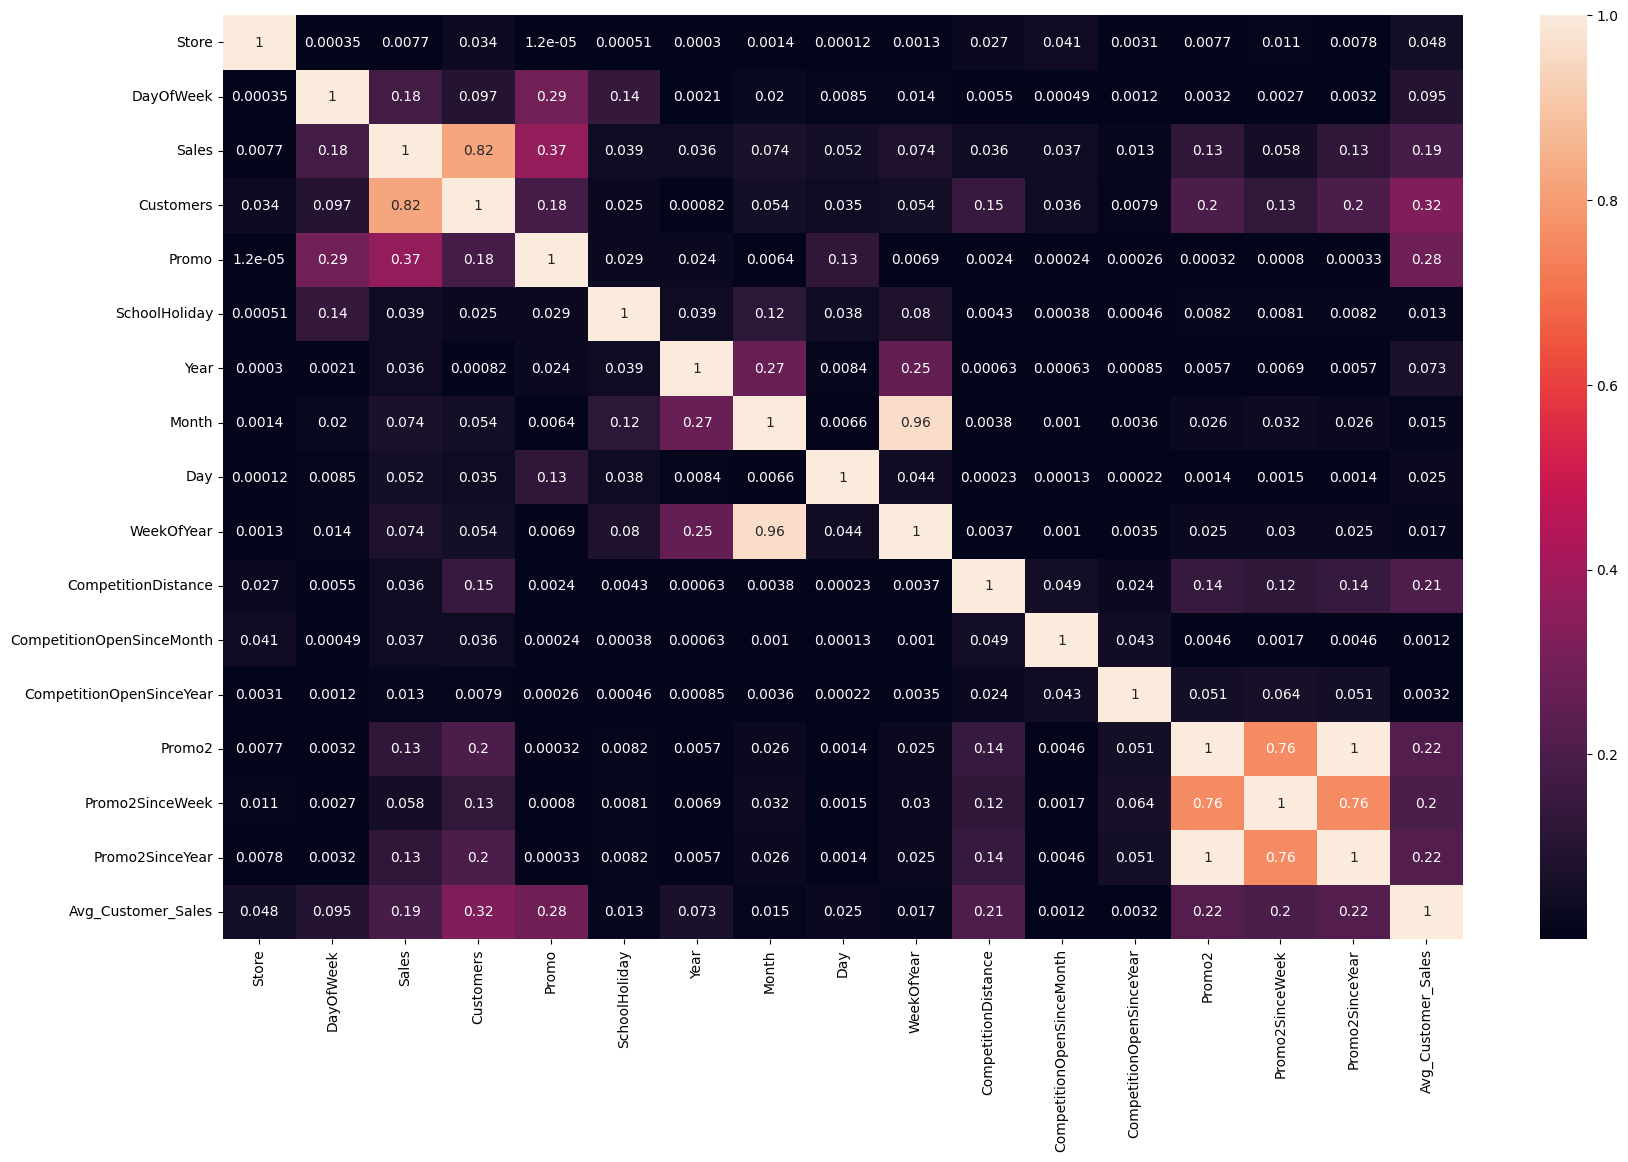

In [71]:
plt.subplots(figsize=(20,12))
sns.heatmap(df_rossmann_1.corr().abs(), annot=True)
plt.savefig("heatmap.png")
plt.show()

##**Conclusion of the EDA:**

1. Sales are highly correlated to number of Customers.
2. The most selling and crowded store type is A.
3. StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.

4. StoreTybe D had the highest buyer cart.

5. Promo runs only in weekdays.

6. For all stores, Promotion leads to increase in Sales and Customers both.

7. More stores are opened during School holidays than State holidays.

8. The stores which are opened during School Holiday have more sales than normal days.

9. Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.

10. Promo2 doesnt seems to be correlated to any significant change in the sales amount.

11. Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.

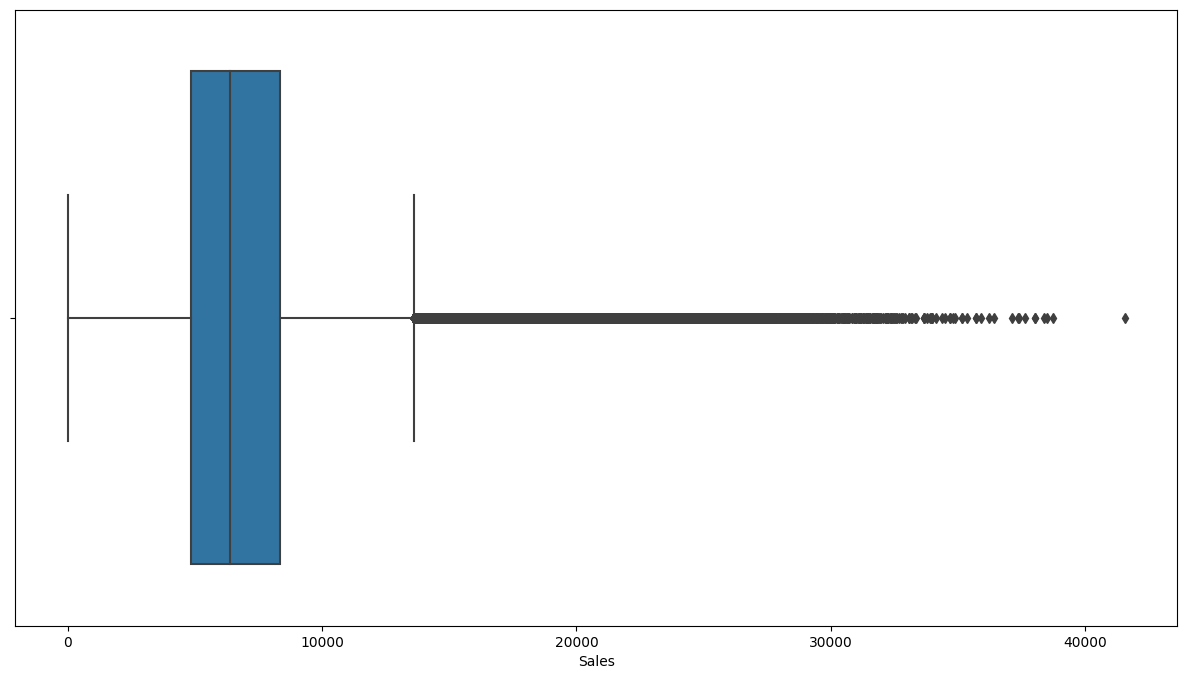

In [72]:
#Copy the dataset
df_rossmann_2 = df_rossmann.copy()

#checking outliers in sales
sns.boxplot(df_rossmann_2['Sales'])
plt.show()

There is a huge number of outliers in the above graph of sales. 

In [73]:
df_rossmann_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   Year                       844392 non-null  int64         
 9   Month                      844392 non-null  int64         
 10  Day                        844392 non-null  int64         
 11  WeekOfYear                 844392 non-null  int64   

In [74]:
from sklearn.ensemble import IsolationForest

# **Now we will detect any abnormal behaviour that can be present in out dataset with the help of Isolation Forest Algorithm.**

In [75]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.005)
isolation_forest.fit(df_rossmann_2['Sales'].values.reshape(-1, 1))
df_rossmann_2['anomaly_score_univariate_sales'] = isolation_forest.decision_function(df_rossmann_2['Sales'].values.reshape(-1, 1))
df_rossmann_2['outlier_univariate_sales'] = isolation_forest.predict(df_rossmann_2['Sales'].values.reshape(-1, 1))

In [76]:
# Total outliers detected
len(df_rossmann_2[df_rossmann_2['outlier_univariate_sales']==-1])

4007

In [77]:
# Subsetting DF other than outliers.
df_rossmann_2 = df_rossmann_2[df_rossmann_2['outlier_univariate_sales']==1]

In [78]:
# Removing Isolation Forest columns
df_rossmann_2.drop(['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

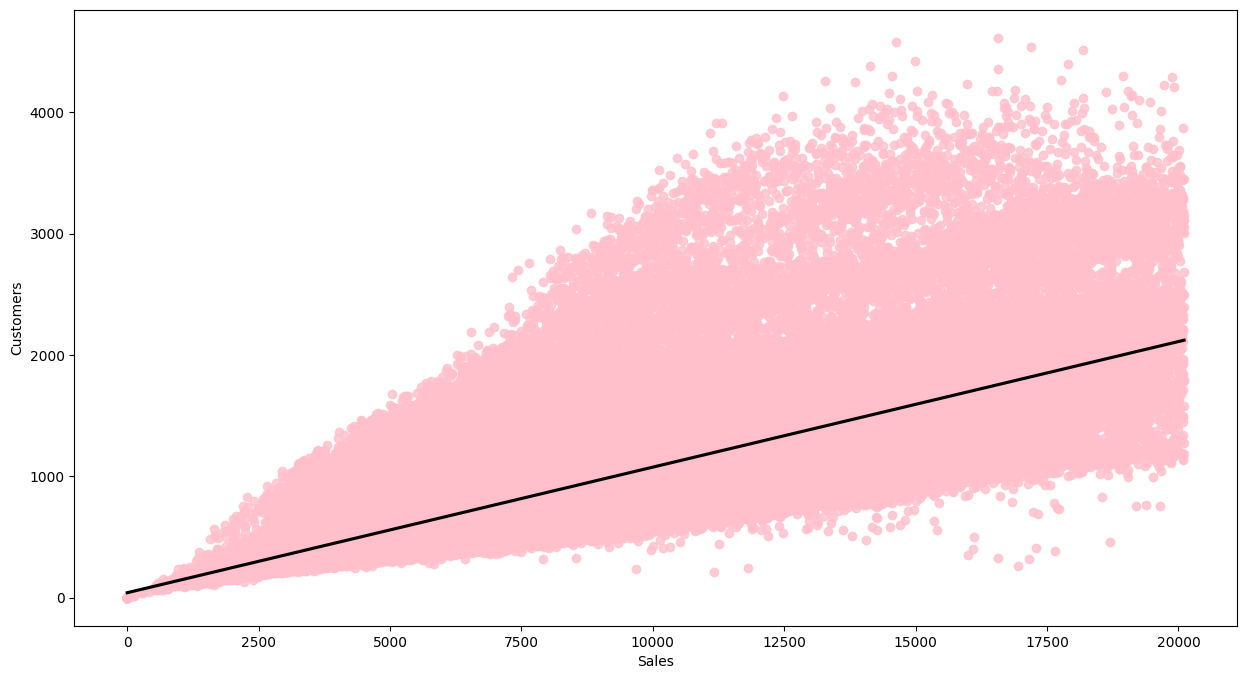

In [79]:
# How customers affect sales
sns.regplot(x=df_rossmann_2['Sales'], y=df_rossmann_2['Customers'],scatter_kws={"color": "pink"}, line_kws={"color": "black"})
plt.show()

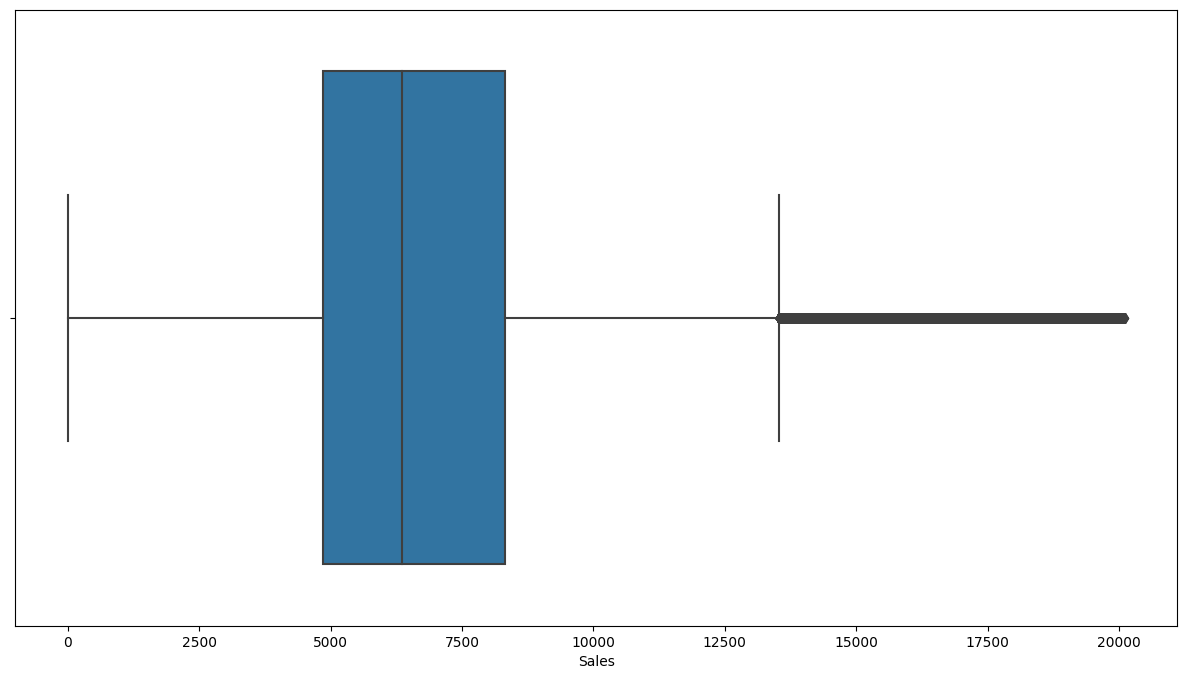

In [80]:
#checking outliers in sales
sns.boxplot(df_rossmann_2['Sales'])
plt.show()

# In the above graph we can see that the outliers have been reduced after using the Isolation Forest algorithm.

In [81]:
df_rossmann_2.shape

(840385, 21)

In [82]:
df_rossmann_2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

**We will be doing One Hot Encoding for the categorical data for the ease of doing EDA**

In [83]:
# One hot encoding

df_rossmann_2 = pd.get_dummies(df_rossmann_2, columns=['StoreType', 'Assortment'], prefix=['StoreType', 'Assortment'])

In [84]:
#Droping the  feature
X = df_rossmann_2.drop(['Store','DayOfWeek','Date','Sales','StateHoliday','Year','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'] , axis = 1)

y = df_rossmann_2.Sales


In [85]:
#Copy the dataset 
X_copy = X.copy()
y_copy = y.copy()

In [86]:
X.head()

,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [87]:
X.columns

Index(['Customers', 'Promo', 'SchoolHoliday', 'Month', 'Day', 'WeekOfYear',
       'CompetitionDistance', 'Promo2', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [88]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

**No we will put the various algorithms to predict the accurate result for the test data.**

# **Linear Regression Algorithm**

In [89]:
# Importing important libraries
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
import statsmodels.api as sm

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import math

In [90]:
#split into trainig and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((672308, 15), (168077, 15), (672308,), (168077,))

In [91]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [92]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor_lin = regressor.fit(X_train, y_train)

In [93]:
regressor_lin.intercept_

6877.60155291844

In [94]:
regressor_lin.coef_

array([ 2.74939304e+03,  5.81851549e+02,  1.83760251e+01,  1.12531441e+02,
        1.67433084e+01, -3.51222627e+01,  1.98198107e+02,  1.54569468e+02,
        2.82770728e+14,  7.46764915e+13,  1.93460397e+14,  2.61888441e+14,
        6.55621970e+13,  1.29045034e+13,  6.54795039e+13])

In [95]:
y_pred_train = regressor_lin.predict(X_train)

In [96]:
y_pred_train

array([6614.77342792, 4214.97655292, 7576.25780292, ..., 5913.74217792,
       5419.15624042, 8060.71874042])

In [97]:
y_train

531522     6157
694534     3426
513256     8930
632462     2617
730892     5974
          ...  
361532     6902
153036    10544
118581     5934
437958     5022
307237     7687
Name: Sales, Length: 672308, dtype: int64

In [98]:
# Predicting the Test set results
Y_pred = regressor_lin.predict(X_test)

In [99]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [100]:
linear_mape = mean_absolute_percentage_error(y_test, Y_pred)
print('mean_absolute_percentage_error =', linear_mape)

mean_absolute_percentage_error = 14.446103913362338


def WMAPE(y_true, y_pred):
    
    if len(y_true[y_true==0])>0: # Use WAPE if there are zeros
        return sum(np.abs(y_true - y_pred)) / sum(y_true) * 100
        
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

linear_wmape = mean_absolute_percentage_error(y_test, Y_pred)
print('mean_absolute_percentage_error =', linear_wmape)

def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

print('weighted_mean_absolute_percentage_error =', wmape(y_test, Y_pred))

In [101]:
print('MSE =', mean_squared_error(y_test, Y_pred))
print('RMSE =', math.sqrt(mean_squared_error(y_test, Y_pred)))

MSE = 1608802.8884665181
RMSE = 1268.3859382958005


In [102]:
#r2
train_score_1 = regressor_lin.score(X_train,y_train)
train_score_1

0.8099671620431022

In [103]:
#r2
test_score_1 = regressor_lin.score(X_test,y_test)
test_score_1

0.8081505973101893

In [104]:
#storing 100 observations for analysis
simple_lr_pred = Y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [105]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

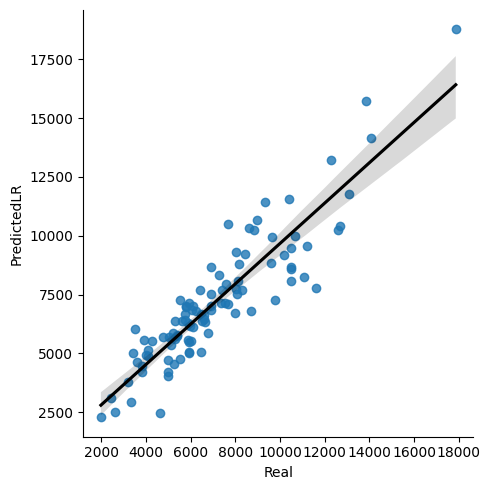

In [106]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'})
plt.show()

In [107]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                 2.749e+05
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:32:41   Log-Likelihood:            -7.1952e+06
No. Observations:              840385   AIC:                         1.439e+07
Df Residuals:                  840371   BIC:                         1.439e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1193.6872      5.205   -229.351      0.000   -1203.888   -1183.486
Customers               7.3776      0.005   1639.199      0.000       7.369       7.386
Promo                1173.7218      2.884    406.993      0.000    1168.069    1179.374
SchoolHoliday          48.0704      3.558     13.512      0.000      41.097      55.043
Month                  34.0299      1.551     21.941      0.000      30.990      37.070
Day                     1.9783      0.164     12.090      0.000       1.658       2.299
WeekOfYear             -2.5826      0.357     -7.232      0.000      -3.283      -1.883
CompetitionDistance     0.0254      0.000    137.146      0.000       0.025       0.026
Promo2                307.9564      2.878    107.009      0.000     302.316     313.597
StoreType_a           228.7197      4.585     49.888      0.000     219.734     237.705
StoreType_b         -2862.6675     12.311   -232.520      0.000   -2886.798   -2838.537
StoreType_c            80.8125      5.214     15.499      0.000      70.593      91.032
StoreType_d          1359.4480      4.940    275.196      0.000    1349.766    1369.130
Assortment_a          923.2093      6.294    146.679      0.000     910.873     935.545
Assortment_b        -3341.4927     14.976   -223.130      0.000   -3370.844   -3312.141
Assortment_c         1224.5962      6.494    188.563      0.000    1211.867    1237.325
==============================================================================
Omnibus:                   110224.428   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           467184.885
Skew:                           0.596   Prob(JB):                         0.00
Kurtosis:                       6.453   Cond. No.                     3.58e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.96e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#**Lasso Regularisation**

In [108]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasreg = lasso_regressor.fit(X_train, y_train)

In [109]:
y_pred_lasso_test = lasso_regressor.predict(X_test)
y_pred_lasso_train = lasso_regressor.predict(X_train)

In [110]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [111]:
lasso_mape = mean_absolute_percentage_error(y_test, y_pred_lasso_test)
print('mean_absolute_percentage_error =', lasso_mape)

mean_absolute_percentage_error = 14.445855436066795


In [112]:
r2_score(y_train, y_pred_lasso_train)

0.8099675477121828

In [113]:
r2_score(y_test, y_pred_lasso_test)

0.8081539234804097

In [114]:
f"R2_score for training set = {r2_score(y_train, y_pred_lasso_train)}  |  R2_score for testing set =  {r2_score(y_test, y_pred_lasso_test)}"

'R2_score for training set = 0.8099675477121828  |  R2_score for testing set =  0.8081539234804097'

In [115]:
f"MSE for test set = {mean_squared_error(y_test, y_pred_lasso_test)}   |   RMSE for test set = {math.sqrt(mean_squared_error(y_test, y_pred_lasso_test))}"

'MSE for test set = 1608774.9960040818   |   RMSE for test set = 1268.3749429896832'

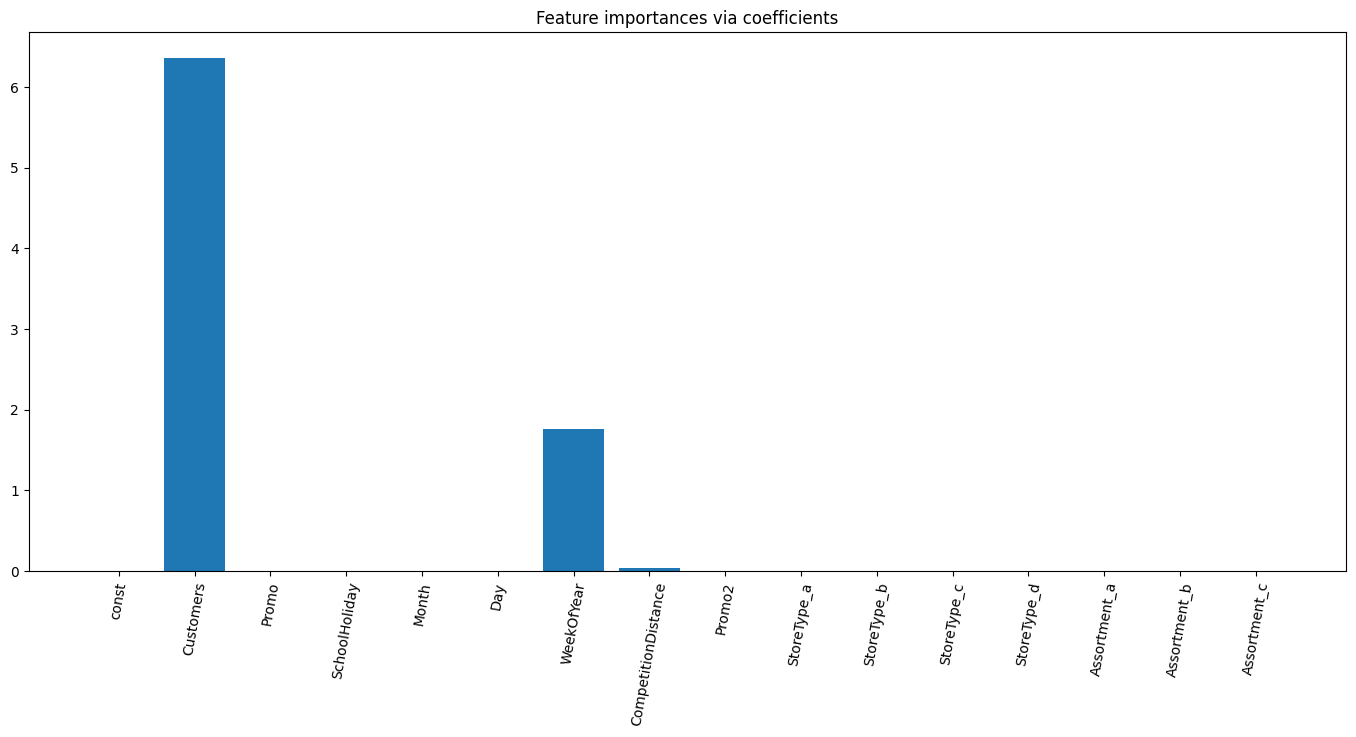

In [116]:
plt.subplots(figsize=(17,7))
lasso = LassoCV()
lasso.fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = X.columns
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

**Here we can see that the Lasso has given most importance to only 2 features and slight importance to the third feature namely Customers, Week of Year and Competition Distance respectively**

# **Ridge Regularisation**

In [117]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [118]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -1598313.782926617


In [119]:
y_pred_ridge_test = ridge_regressor.predict(X_test)
y_pred_ridge_train = ridge_regressor.predict(X_train)

In [120]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [121]:
ridge_mape = mean_absolute_percentage_error(y_test, y_pred_ridge_test)
print('mean_absolute_percentage_error =', ridge_mape)

mean_absolute_percentage_error = 14.44593270310251


In [122]:
f"MSE for test set = {mean_squared_error(y_test, y_pred_ridge_test)}   |   RMSE for test set = {math.sqrt(mean_squared_error(y_test, y_pred_ridge_test))}"

'MSE for test set = 1608774.236420301   |   RMSE for test set = 1268.3746435577705'

In [123]:
f"R2_score for training set = {r2_score(y_train, y_pred_ridge_train)}  |  R2_score for testing set =  {r2_score(y_test, y_pred_ridge_test)}"

'R2_score for training set = 0.809967547355009  |  R2_score for testing set =  0.8081540140606142'

In [124]:
print("Adjusted R2 for testing set : ",1-(1-r2_score(y_test, y_pred_ridge_test)) * (( X_test.shape[0]-1) / (X_test.shape[0] - X_test.shape[1]-1 )))

Adjusted R2 for testing set :  0.808136891171966


In [125]:
print("Adjusted R2 for training set : ",1-(1-r2_score(y_train, y_pred_ridge_train)) * (( X_train.shape[0]-1) / (X_train.shape[0] - X_train.shape[1]-1 )))

Adjusted R2 for training set :  0.8099633074015518


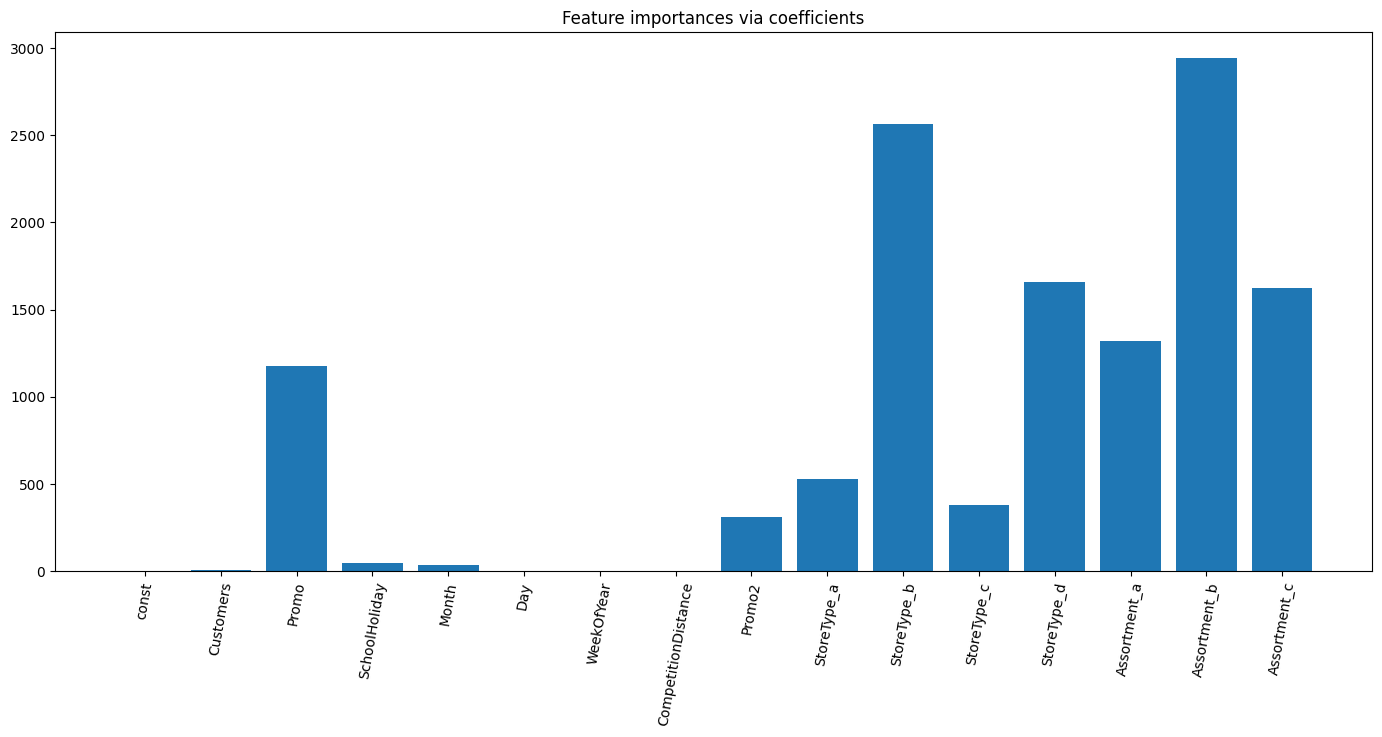

In [126]:
plt.subplots(figsize=(17,7))
ridge_1 = RidgeCV()
ridge_1.fit(X,y)
importance = np.abs(ridge_1.coef_)
feature_names = X.columns
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

**In the above graph, while doing Ridge regularisation , it has given importance to many featuresexcept for 4 features**

## **Decision Tree Algorithm**

In [127]:
x_train, x_test, Y_train, Y_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((672308, 15), (168077, 15), (672308,), (168077,))

In [128]:
# Setting parameters for Grid Search
# Criteria
criterion = ['mse']

# Maximum depth of trees
max_depth = [ 10 ,15, 18, 20,  25]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion}

In [129]:
# Create an instance of the Decision Tree Regressor
DTR_model = DecisionTreeRegressor()

# Grid search
DTR_grid = GridSearchCV(estimator = DTR_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2)

DTR_grid.fit(x_train,Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ........................criterion=mse, max_depth=10; total time=   2.3s
[CV] END ........................criterion=mse, max_depth=10; total time=   2.1s
[CV] END ........................criterion=mse, max_depth=10; total time=   2.2s
[CV] END ........................criterion=mse, max_depth=15; total time=   2.5s
[CV] END ........................criterion=mse, max_depth=15; total time=   2.4s
[CV] END ........................criterion=mse, max_depth=15; total time=   2.4s
[CV] END ........................criterion=mse, max_depth=18; total time=   2.8s
[CV] END ........................criterion=mse, max_depth=18; total time=   2.8s
[CV] END ........................criterion=mse, max_depth=18; total time=   2.7s
[CV] END ........................criterion=mse, max_depth=20; total time=   3.2s
[CV] END ........................criterion=mse, max_depth=20; total time=   3.1s
[CV] END ........................criterion=mse, m

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [10, 15, 18, 20, 25]},
             verbose=2)

In [130]:
DTR_optimal_model = DTR_grid.best_estimator_
DTR_optimal_model

DecisionTreeRegressor(criterion='mse', max_depth=18)

In [131]:
DTR_grid.best_score_

0.9290720494508129

In [132]:
# Predictions Train and Test
Y_pred_DT_train = DTR_optimal_model.predict(x_train)
Y_pred_DT_test  = DTR_optimal_model.predict(x_test)

In [133]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [134]:
dt_mape = mean_absolute_percentage_error(y_test, Y_pred_DT_test)
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, Y_pred_DT_test))

mean_absolute_percentage_error = 7.282298014609484


In [135]:
# MSE - Test 
mean_squared_error(Y_test,Y_pred_DT_test)

540651.7083846092

In [136]:
# R-sqaured for Train
r2_score(Y_train, Y_pred_DT_train)

0.9664984662005898

In [137]:
# R-sqaured for Test
r2_score(Y_test, Y_pred_DT_test)

0.9355273986263908

In [138]:
# # R-sqaured for Test
# r2_score(Y_test, DTR_test_pred)

In [139]:
f"MSE for test set = {mean_squared_error(Y_test,Y_pred_DT_test)}   |   RMSE for test set = {math.sqrt(mean_squared_error(Y_test,Y_pred_DT_test))}"

'MSE for test set = 540651.7083846092   |   RMSE for test set = 735.2902205147361'

In [140]:
f"R2_score for training set = {r2_score(Y_train, Y_pred_DT_train)}  |  R2_score for testing set =  {r2_score(Y_test,Y_pred_DT_test)}"

'R2_score for training set = 0.9664984662005898  |  R2_score for testing set =  0.9355273986263908'

##**Random Forest Algorithm**

In [141]:
# Criterion
criterion = ['mse']
# Maximum depth of trees
max_depth = [10,15,18,22]

# Number of estimator
n_estimators = [100, 150]
# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion,'n_estimators':n_estimators}

param_dict

{'max_depth': [10, 15, 18, 22],
 'criterion': ['mse'],
 'n_estimators': [100, 150]}

In [142]:
rf_model = RandomForestRegressor()

# Grid search

rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2 )

rf_grid.fit(x_train,Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ......criterion=mse, max_depth=10, n_estimators=100; total time= 2.0min
[CV] END ......criterion=mse, max_depth=10, n_estimators=100; total time= 2.3min
[CV] END ......criterion=mse, max_depth=10, n_estimators=100; total time= 2.5min
[CV] END ......criterion=mse, max_depth=10, n_estimators=150; total time= 3.7min
[CV] END ......criterion=mse, max_depth=10, n_estimators=150; total time= 3.7min
[CV] END ......criterion=mse, max_depth=10, n_estimators=150; total time= 3.7min
[CV] END ......criterion=mse, max_depth=15, n_estimators=100; total time= 3.3min
[CV] END ......criterion=mse, max_depth=15, n_estimators=100; total time= 3.3min
[CV] END ......criterion=mse, max_depth=15, n_estimators=100; total time= 3.3min
[CV] END ......criterion=mse, max_depth=15, n_estimators=150; total time= 4.9min
[CV] END ......criterion=mse, max_depth=15, n_estimators=150; total time= 4.9min
[CV] END ......criterion=mse, max_depth=15, n_est

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [10, 15, 18, 22],
                         'n_estimators': [100, 150]},
             verbose=2)

In [143]:
rf_grid.best_params_

{'criterion': 'mse', 'max_depth': 22, 'n_estimators': 150}

In [144]:
rf_optimal_model = rf_grid.best_estimator_

In [145]:
Y_pred_rf_train = rf_optimal_model.predict(x_train)   # Prediction for train dataset
Y_pred_rf_test  = rf_optimal_model.predict(x_test)     # Predictionfor test dataset

In [146]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [147]:
rf_mape = mean_absolute_percentage_error(y_test, Y_pred_rf_test)
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, Y_pred_rf_test))

mean_absolute_percentage_error = 5.812509947065736


In [148]:
f"MSE for test set = {mean_squared_error(Y_test,Y_pred_rf_test)}   |   RMSE for test set = {math.sqrt(mean_squared_error(Y_test,Y_pred_rf_test))}"

'MSE for test set = 321485.12371202593   |   RMSE for test set = 566.9965817463328'

In [149]:
f"R2_score for training set = {r2_score(Y_train, Y_pred_rf_train)}  |  R2_score for testing set =  {r2_score(Y_test,Y_pred_rf_test)}"

'R2_score for training set = 0.989444051730636  |  R2_score for testing set =  0.9616629672907903'

In [150]:
#storing 100 observations for analysis
rf_prd = Y_pred_rf_test[:100]
rf_real = Y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [151]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [152]:
# taking 4 sample
dataset_rf.sample(4)

,Real,PredictedRF,diff
738234,5519,6018.539526,499.539526
235456,10169,9818.523243,350.476757
339907,5762,5866.235739,104.235739
726186,7285,8261.489332,976.489332


In [153]:
#Statistical description of our predictions and actual values 
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.000000,100.000000
mean,7101.110000,7020.932304,362.673153
std,2846.209835,2695.746828,334.216224
min,1989.000000,1876.980000,6.954825
25%,5279.000000,5222.980083,103.626503
50%,6477.500000,6297.659669,285.737856
75%,8460.250000,8380.321344,500.005495
max,17862.000000,17014.827053,1720.134746


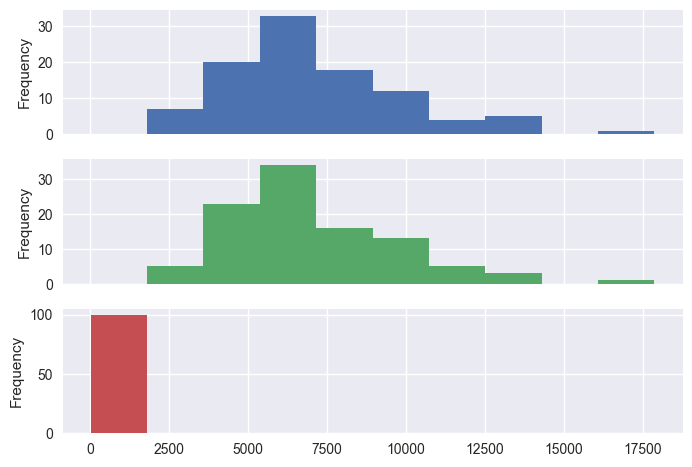

In [154]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False)
plt.show()

### As we can see that Actual, Prediction values are approximately closed to each other and there is no such significant variation in our plots.



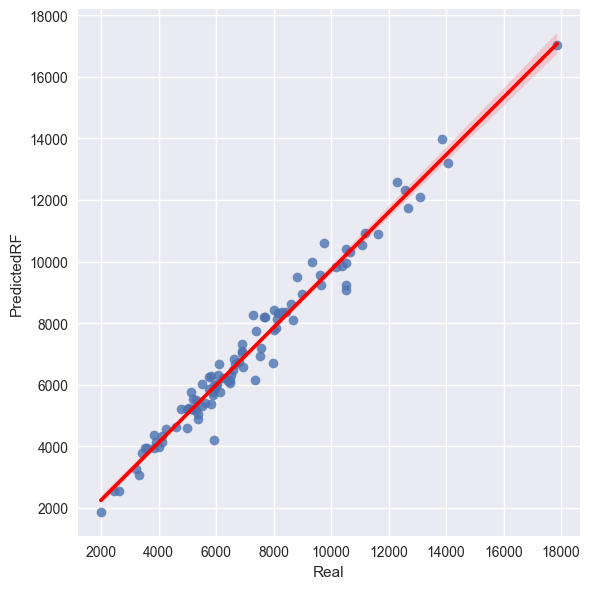

In [155]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, size=6, aspect=1)
plt.show()

##**Feature Importance On Random Forest Regressor**

###As we can see that Random Forest has the highest test score

In [156]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [157]:
columns=x_train.columns

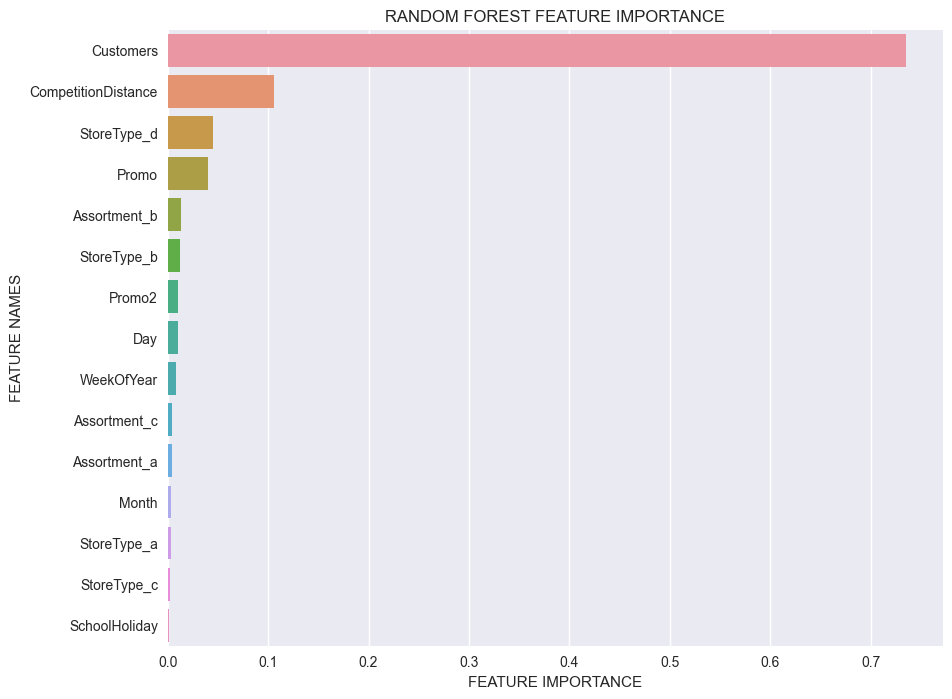

In [158]:
plot_feature_importance(rf_optimal_model.feature_importances_,columns[:],'RANDOM FOREST')
plt.show()

##**Gradient Boosting Algorithm**

In [159]:
!pip install lightgbm

In [160]:
# Maximum depth of trees
max_depth = [15,20, 22]

# bagging fraction
bagging_fraction = [0.5, 0.6,0.7]

#max-bin
max_bin = [400, 500, 600]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'bagging_fraction':bagging_fraction, 'max_bin': max_bin}

param_dict

{'max_depth': [15, 20, 22],
 'bagging_fraction': [0.5, 0.6, 0.7],
 'max_bin': [400, 500, 600]}

In [161]:
# Create an instance of the Gradient Regressor
LGB = lgb.LGBMRegressor()

# Grid search
LGB_grid = GridSearchCV(estimator = LGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2')

LGB_grid.fit(x_train,Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[CV] END ....bagging_fraction=0.5, max_bin=400, max_depth=15; total time=  22.5s
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[CV] END ....bagging_fraction=0.5, max_bin=400, max_depth=15; total time=   4.3s
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[CV] END ....bagging_fraction=0.5, max_bin=400, max_depth=15; total time=   2.6s
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[CV] END ....bagging_fraction=0.5, max_bin=400, max_depth=20; total time=   3.0s
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[CV] END ....bagging_fraction=

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'bagging_fraction': [0.5, 0.6, 0.7],
                         'max_bin': [400, 500, 600],
                         'max_depth': [15, 20, 22]},
             scoring='r2', verbose=2)

In [162]:
LGB_grid.best_score_

0.9162349065336413

In [163]:
LGB_optimal_model = LGB_grid.best_estimator_
LGB_optimal_model

LGBMRegressor(bagging_fraction=0.5, max_bin=600, max_depth=15)

In [164]:
LGB_grid.best_params_

{'bagging_fraction': 0.5, 'max_bin': 600, 'max_depth': 15}

In [165]:
Y_pred_lgb_train = LGB_optimal_model.predict(x_train)   # Prediction for train dataset
Y_pred_lgb_test  = LGB_optimal_model.predict(x_test)

In [166]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [167]:
lgb_mape = mean_absolute_percentage_error(y_test, Y_pred_lgb_test)
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, Y_pred_lgb_test))

mean_absolute_percentage_error = 9.721191228884223


In [168]:
f"MSE for test set = {mean_squared_error(Y_test,Y_pred_lgb_test)}   |   RMSE for test set = {math.sqrt(mean_squared_error(Y_test,Y_pred_lgb_test))}"

'MSE for test set = 712260.7158387782   |   RMSE for test set = 843.9553991999685'

In [169]:
f"R2_score for training set = {r2_score(Y_train, Y_pred_lgb_train)}  |  R2_score for testing set =  {r2_score(Y_test,Y_pred_lgb_test)}"

'R2_score for training set = 0.9157929847381732  |  R2_score for testing set =  0.9150630609425772'

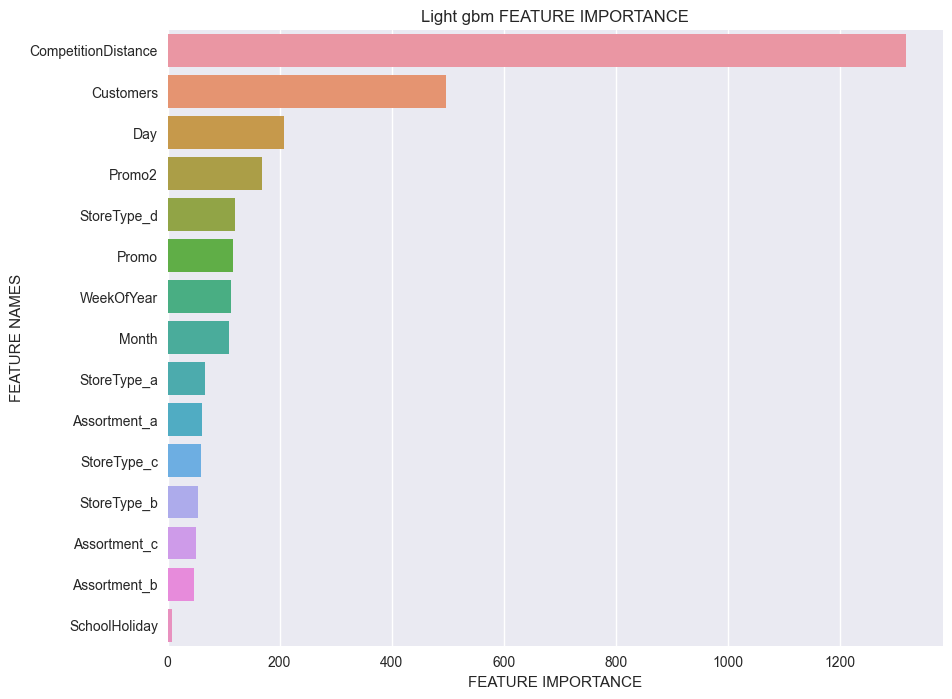

In [170]:
plot_feature_importance(LGB_optimal_model.feature_importances_,columns[:],'Light gbm')
plt.show()

#Implementing XG Boost

In [171]:
import sys
!{sys.executable} -m pip install xgboost

In [172]:
import xgboost as xgb

In [173]:
# Number of trees
n_estimators = [100, 200]

# Maximum depth of trees
max_depth = [8, 12, 20]

# Child weight
min_child_weight= [10, 15]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

param_dict        

{'n_estimators': [100, 200],
 'max_depth': [8, 12, 20],
 'min_child_weight': [10, 15]}

In [174]:
xgb = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator = xgb,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2' )

xgb_grid.fit(x_train,Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .max_depth=8, min_child_weight=10, n_estimators=100; total time=  51.4s
[CV] END .max_depth=8, min_child_weight=10, n_estimators=100; total time=  34.3s
[CV] END .max_depth=8, min_child_weight=10, n_estimators=100; total time=  32.4s
[CV] END .max_depth=8, min_child_weight=10, n_estimators=200; total time= 1.0min
[CV] END .max_depth=8, min_child_weight=10, n_estimators=200; total time=  58.4s
[CV] END .max_depth=8, min_child_weight=10, n_estimators=200; total time=  53.7s
[CV] END .max_depth=8, min_child_weight=15, n_estimators=100; total time=  27.2s
[CV] END .max_depth=8, min_child_weight=15, n_estimators=100; total time=  27.0s
[CV] END .max_depth=8, min_child_weight=15, n_estimators=100; total time=  27.2s
[CV] END .max_depth=8, min_child_weight=15, n_estimators=200; total time=  53.6s
[CV] END .max_depth=8, min_child_weight=15, n_estimators=200; total time=  58.7s
[CV] END .max_depth=8, min_child_weight=15, n_es

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...ot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'max_depth': [8, 12, 20], 'min_child_weight': [10, 15],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [175]:
xgb_grid.best_params_

{'max_depth': 12, 'min_child_weight': 15, 'n_estimators': 200}

In [176]:
xgb_optimal_model = xgb_grid.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=15,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [177]:
y_pred_test = xgb_optimal_model.predict(x_test)

In [178]:
y_pred_train = xgb_optimal_model.predict(x_train)

In [179]:
x_train.columns

Index(['Customers', 'Promo', 'SchoolHoliday', 'Month', 'Day', 'WeekOfYear',
       'CompetitionDistance', 'Promo2', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [180]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [181]:
xgb_mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

mean_absolute_percentage_error = 4.983614116557567


In [182]:
r2_score(Y_train, y_pred_train)

0.9843109906523231

In [183]:
r2_score(Y_test, y_pred_test)

0.9742278442635234

In [184]:
print(y_pred_test)

[ 4610.5156 12098.243   6077.3403 ... 16573.541   5076.3325  5265.358 ]


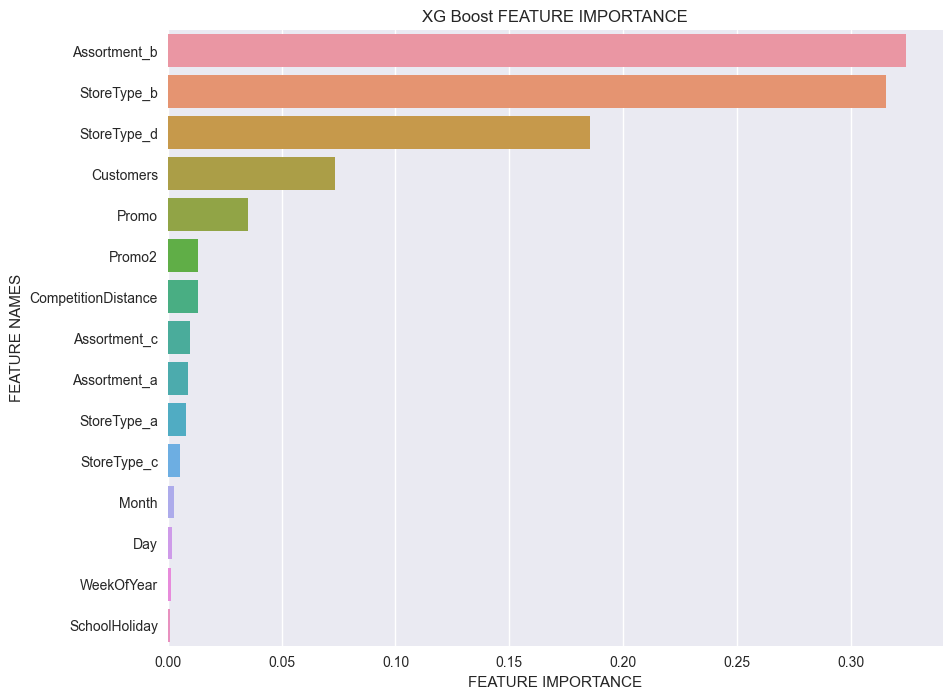

In [185]:
plot_feature_importance(xgb_optimal_model.feature_importances_,columns[:],'XG Boost')
plt.show()

In [186]:
Result_df_1 = pd.DataFrame({'Models': ['Linear_regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'LGB', 'XG Boost'],
                         'MAPE' :[linear_mape, lasso_mape, ridge_mape, dt_mape, rf_mape, lgb_mape, xgb_mape ]})

In [187]:
Result_df = pd.DataFrame({'Models': ['Linear_regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'LGB', 'XG Boost'], 'Train R2 score' :[80.92, 80.92, 80.92, 98.02, 98.93, 91.46, 97.62 ], 'Test R2 Score' :[80.91, 80.91, 80.91, 93.70, 96.12, 91.38, 97.24]})

# **Conclusion**

In [188]:
Result_df_1.set_index('Models')

,MAPE
Models,
Linear_regression,14.446104
Ridge,14.445855
Lasso,14.445933
Decision Tree,7.282298
Random Forest,5.812510
LGB,9.721191
XG Boost,4.983614


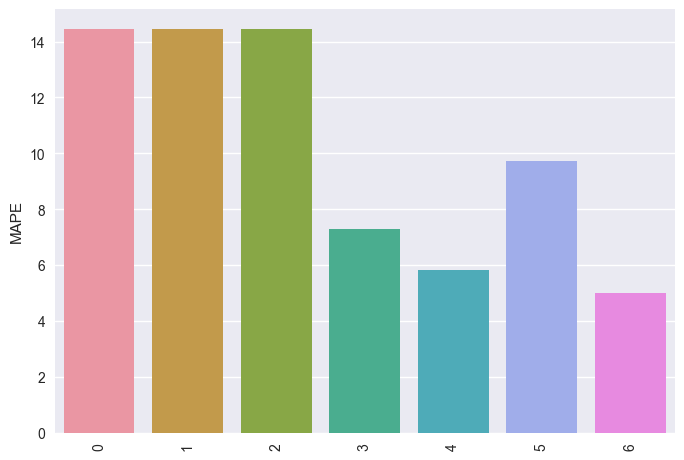

In [189]:
plot = sns.barplot(data=Result_df_1, x=Result_df_1.index, y=Result_df_1['MAPE'])
plt.xticks(rotation = 90)
plt.show()

In [190]:
Result_df.set_index('Models')

,Train R2 score,Test R2 Score
Models,,
Linear_regression,80.92,80.91
Ridge,80.92,80.91
Lasso,80.92,80.91
Decision Tree,98.02,93.70
Random Forest,98.93,96.12
LGB,91.46,91.38
XG Boost,97.62,97.24


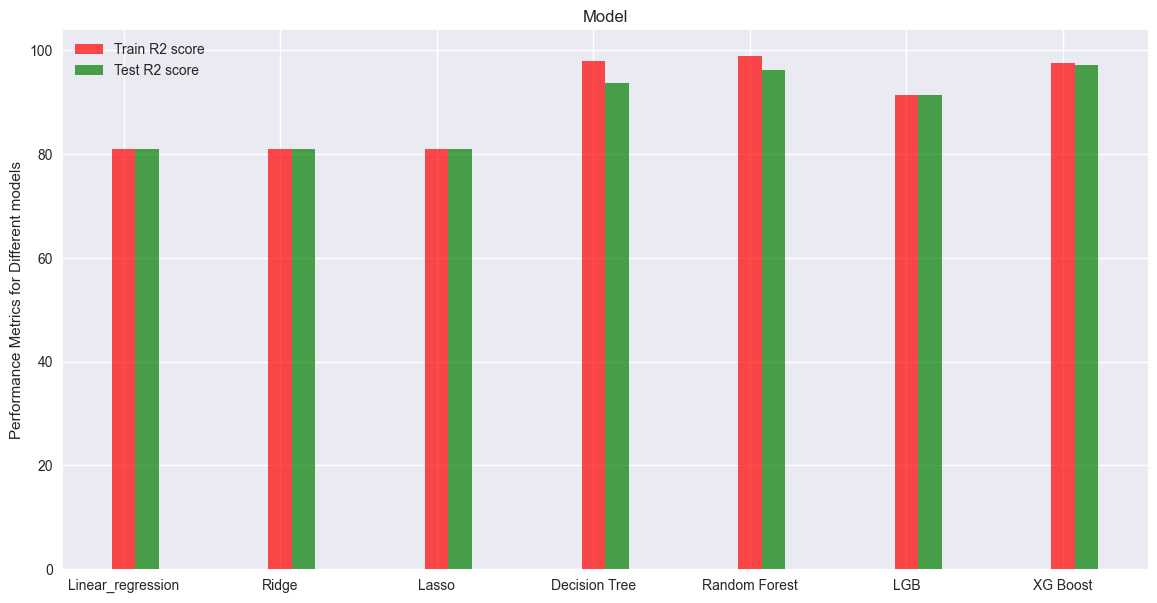

In [191]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Linear_regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'LGB', 'XG Boost']
values = [80.92, 80.92, 80.92, 98.02, 98.93, 91.46, 97.62]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'Train R2 score')
plt.xticks(model, models)

ax = plt.subplot(111)

models = ['Linear_regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'LGB', 'XG Boost' ]
values = [80.91, 80.91, 80.91, 93.70, 96.12, 91.38, 97.24]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'Test R2 score')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()



1.   Linear regression is simple base model with low accuracy.
2.   Ridge and Lasso showing same score as linear regression.
3.   For Decision Tree training score is higher than testing so decison tree is a bit of overfitting model
4.   Random Forest having good trainig and testing score,but a bit a overfitting.
5.  LGM is good model but comparitively low accuracy.
6.  XGBoost is optimal model with good accuracy and best fit.

As We Can See that XGBoost has Highest Training Score and Highest Testing Score as well as less "MAPE" score so XGBoost is the Best Model For this Dataset.

## Making pickle file

In [192]:
import pickle

    ~ Saving the model ~

In [193]:
with open( "model_1.pkl", "wb" ) as f:
	pickle.dump( xgb_optimal_model, f)

# save the model to disk
pickle_out = open("model.pkl","wb")
pickle.dump(xgb_optimal_model, pickle_out)
pickle_out.close()

    ~ load the saved model ~

In [194]:
with open( "model_1.pkl", "rb" ) as f:
	loaded_model = pickle.load(f)

In [195]:
print(loaded_model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=15,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [196]:
print(type(loaded_model))

<class 'xgboost.sklearn.XGBRegressor'>


In [197]:
result = loaded_model.predict(x_test)
print(result)

[ 4610.5156 12098.243   6077.3403 ... 16573.541   5076.3325  5265.358 ]


In [199]:
x_train.columns

Index(['Customers', 'Promo', 'SchoolHoliday', 'Month', 'Day', 'WeekOfYear',
       'CompetitionDistance', 'Promo2', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [219]:
df_rossmann_2["Customers"].value_counts()

560     2414
576     2363
603     2337
571     2329
555     2328
        ... 
3168       1
4032       1
4269       1
3405       1
2713       1
Name: Customers, Length: 3752, dtype: int64

# save the model to disk
pickle_out = open("model.pkl","wb")
pickle.dump(xgb_optimal_model, pickle_out)
pickle_out.close()

# load the model from disk
pickle_in = open("model.pkl", "rb")
pickle.load(pickle_in)

### <Center>-----------------------------------------END---------------------------------------------